<center>
<img src="https://avatars.mds.yandex.net/i?id=08831819d2b500822a90327ea7aee923ef8a5322-9154878-images-thumbs&n=13" height="250">

# Андан на экономе: домашнее задание 3
</center>


> Bicycle bicycle bicycle  <br> I want to ride my bicycle <br> I want to ride my bike <br> I want to ride my bicycle <br>  I want to ride it where I like

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Bicycle Race (Queen)](https://www.youtube.com/watch?v=r2lT4oE4DxE)**

**ФИО:** Нуруллин Ринат Ильдарович


In [3]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Спрос на велосипеды

В этой домашке мы будем работать с данными о спросе на велосипеды. Мы научимся его предсказывать.

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/bikes_rent.csv')
print(df.shape)
df.head()

(731, 13)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


__Описание переменных:__

* `season`  1 - весна, 2 - лето, 3 - осень, 4 - зима
* `yr`  0 - 2011, 1 - 2012
* `mnth`  от 1 до 12
* `holiday`  0 - нет праздника, 1 - есть праздник
* `weekday`  от 0 до 6
* `workingday`  0 - нерабочий день, 1 - рабочий день
* `weathersit`  оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `temp`  температура в Цельсиях
* `atemp`  температура по ощущениям в Цельсиях
* `hum`  влажность
* `windspeed(mph)`  скорость ветра в милях в час
* `windspeed(ms)`  скорость ветра в метрах в секунду
* `cnt`  количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

In [5]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="cyan", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)
    plt.grid(True, alpha = 0.2)
    
    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="cyan", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    plt.grid(True, alpha = 0.2)
    pass

## 1. EDA

__а) [5 баллов]__ Проверьте, есть ли в данных пропуски 

In [6]:
df.isnull().sum()
#пропусков нет

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

__б) [5 баллов]__ Составьте список из категориальных переменных и список из действительных переменных.

In [7]:
#категориальные принимают значения из ограниченного множества значений
#непрерывные переменные принимают любые действительные значения

var_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
var_real = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']
target = 'cnt'

__в) [5 баллов]__ Нарисуйте гистограмму для целевого признака. Что можете сказать о его хвосте? Надо ли предпринять какие-нибудь манипуляции, связанные с борьбой с выбросами? 

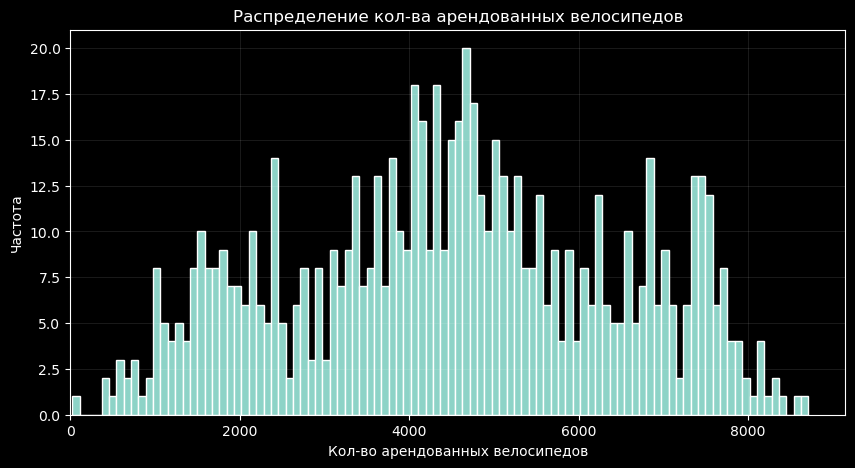

In [8]:
plt.style.use('dark_background')    
plt.figure(figsize = (10, 5))
plt.hist(df['cnt'], bins = 100, edgecolor = 'white')
plt.grid(True, alpha = 0.1)
plt.xlim(0)
plt.title('Распределение кол-ва арендованных велосипедов')
plt.xlabel('Кол-во арендованных велосипедов')
plt.ylabel('Частота')
plt.show()


__Ответ:__  Очень хочется, но, как будто бы, нельзя сказать, что распределение имеет нормальный характер. Отчетливо видны три пика частотности в районах ~1900, ~4200, ~7300. Скорее всего, причина подобного поведедения заключается в наличии определенных групп дней, в которые люди более склонны взять велосипед в аренду (праздники, теплые дни и т.д.)

хвост хихи




__г) [5 баллов]__ Давайте посмотрим на то, как переменные коррелируют с таргетом. Для этого постройте соответствующую облака рассеивания. 

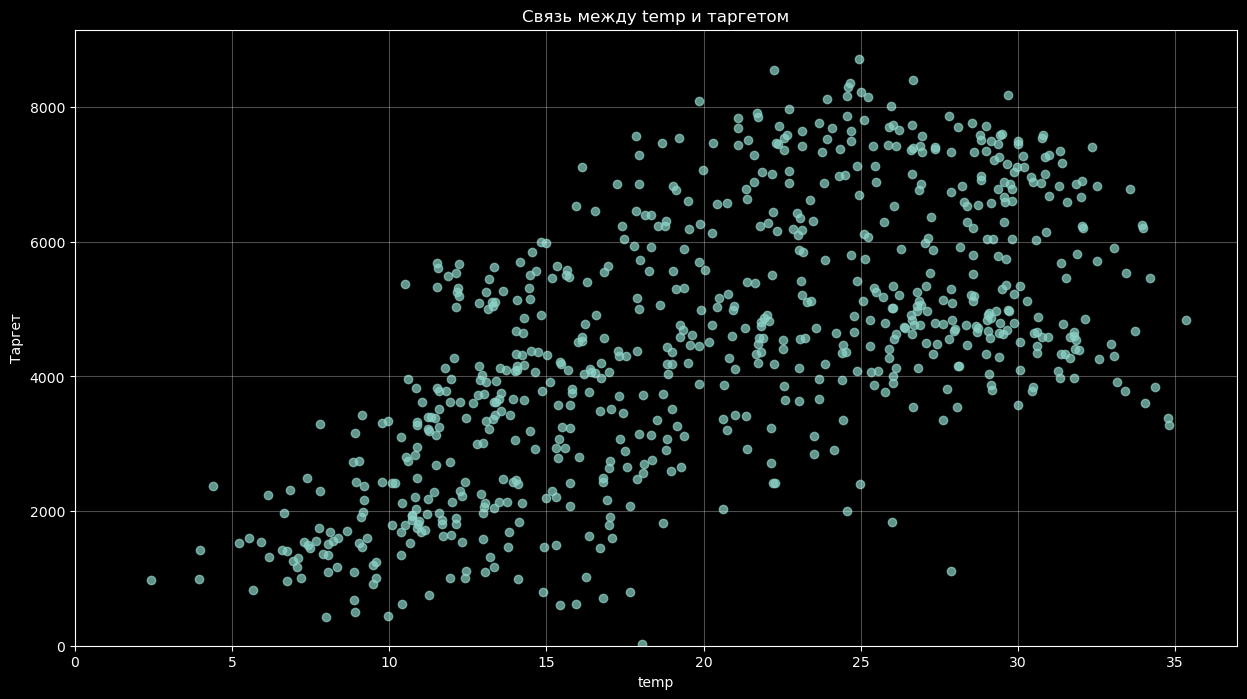

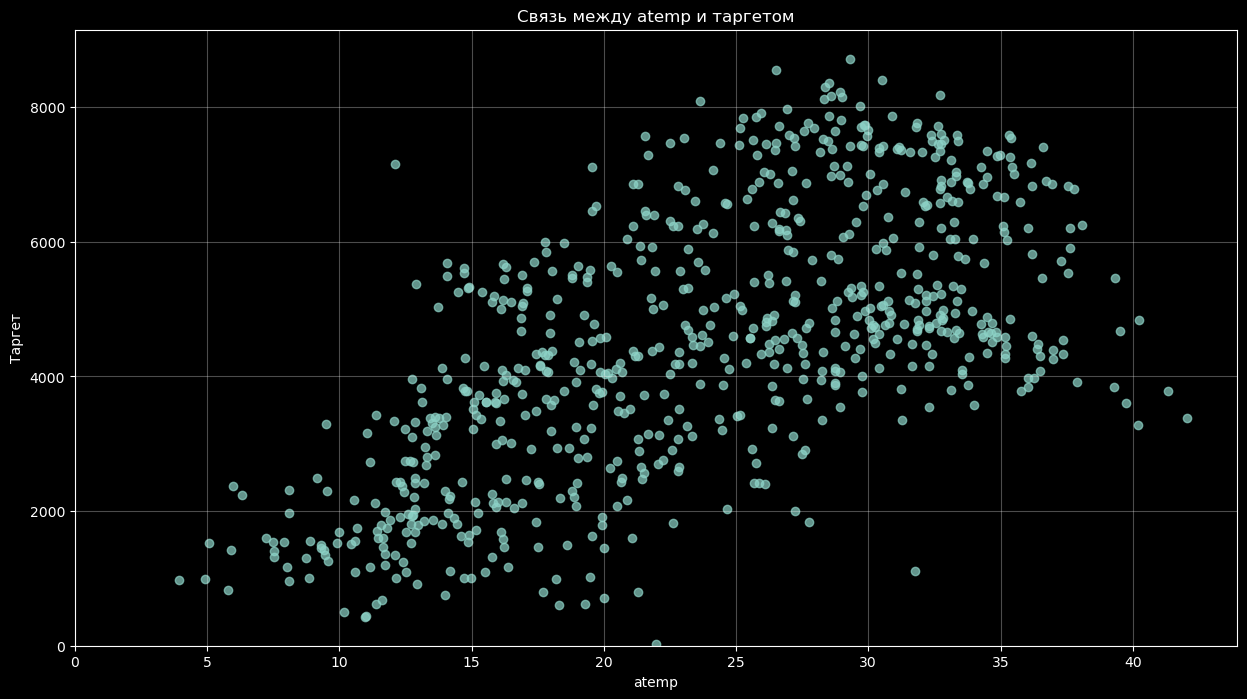

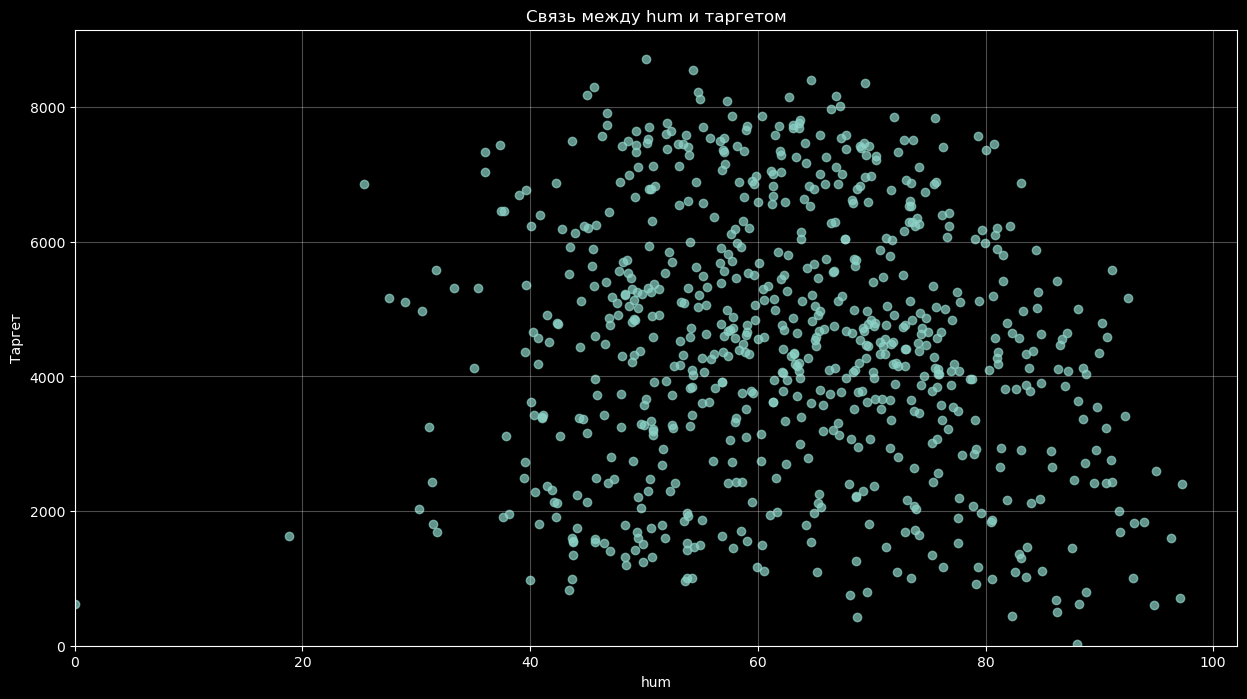

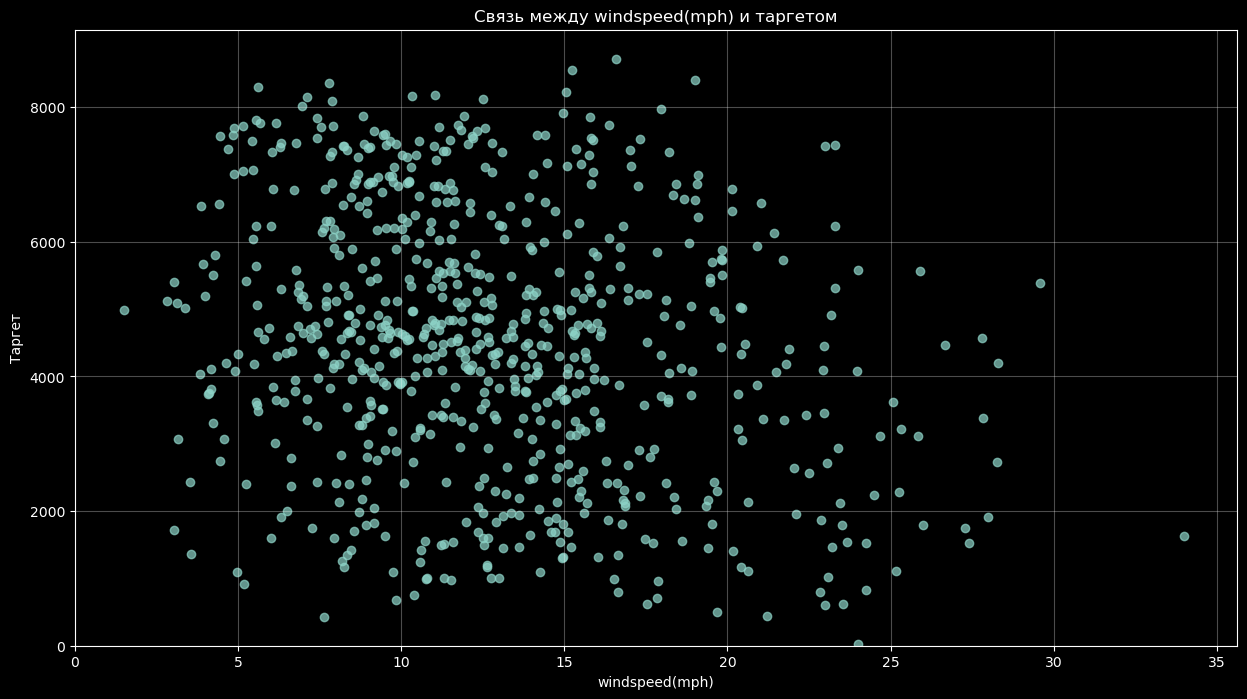

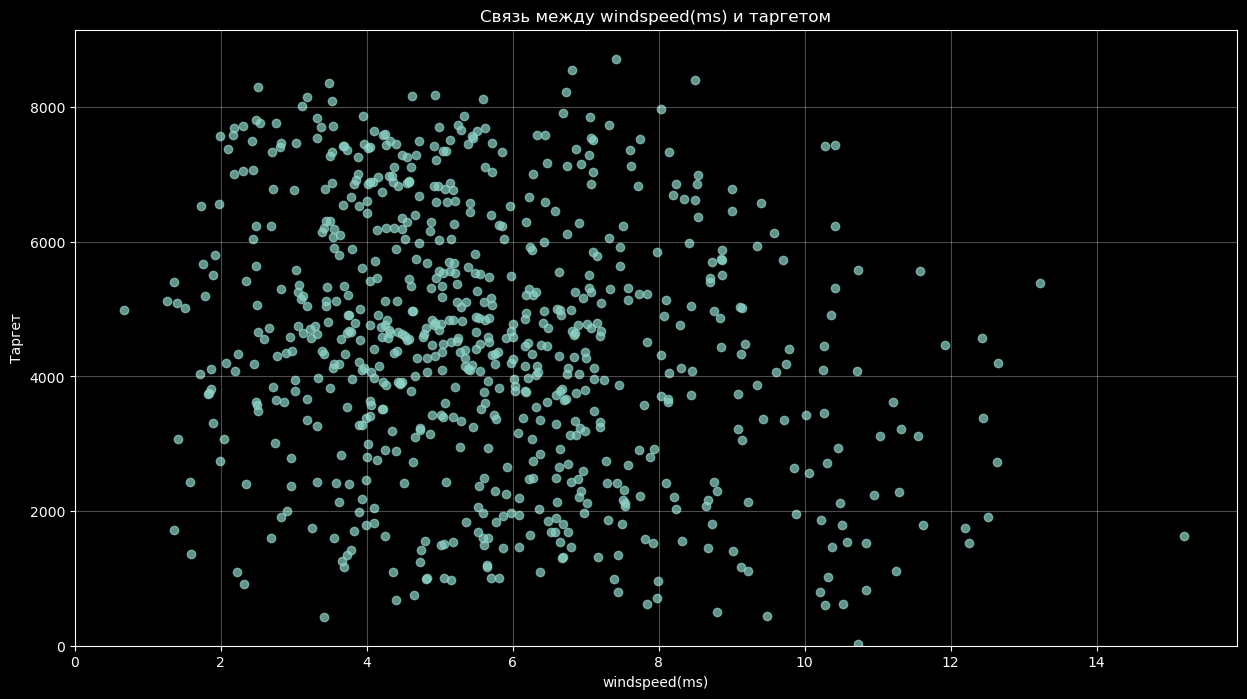

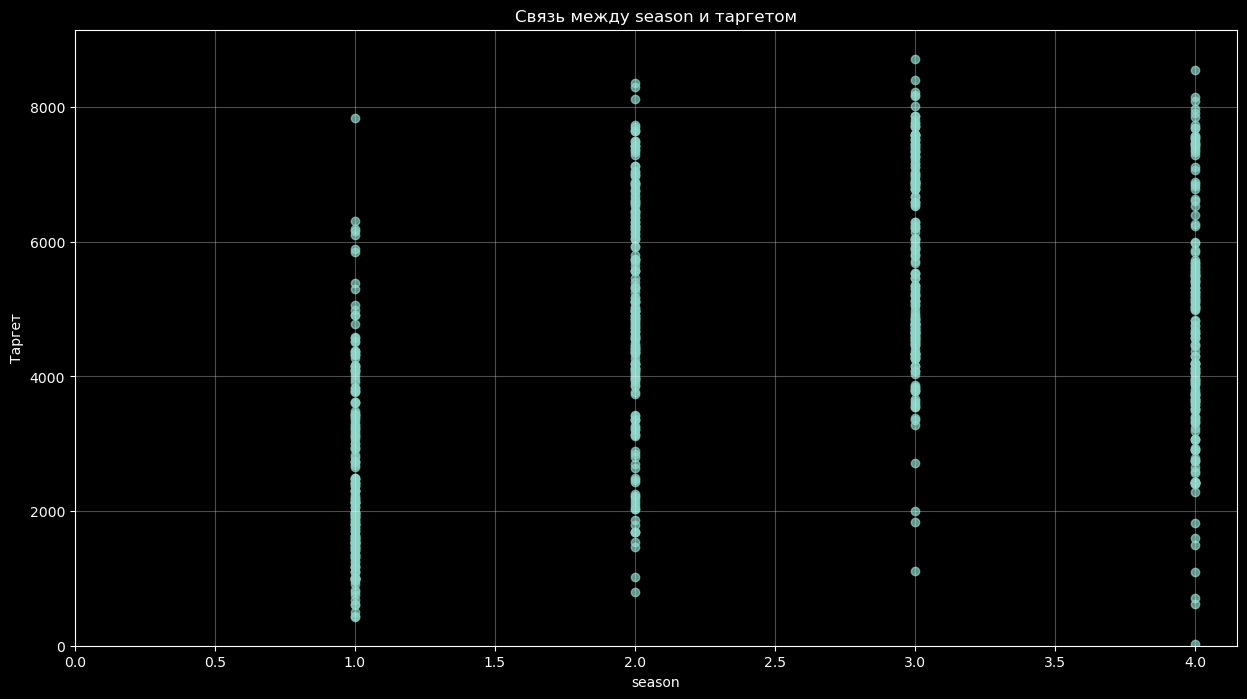

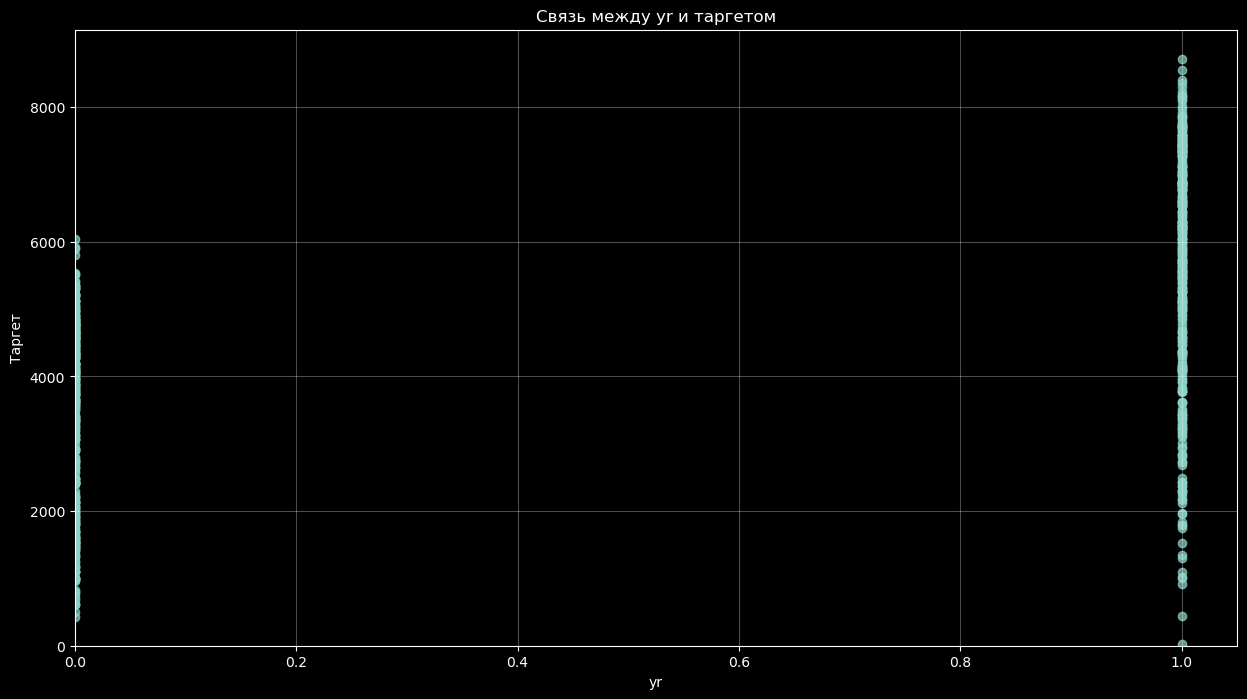

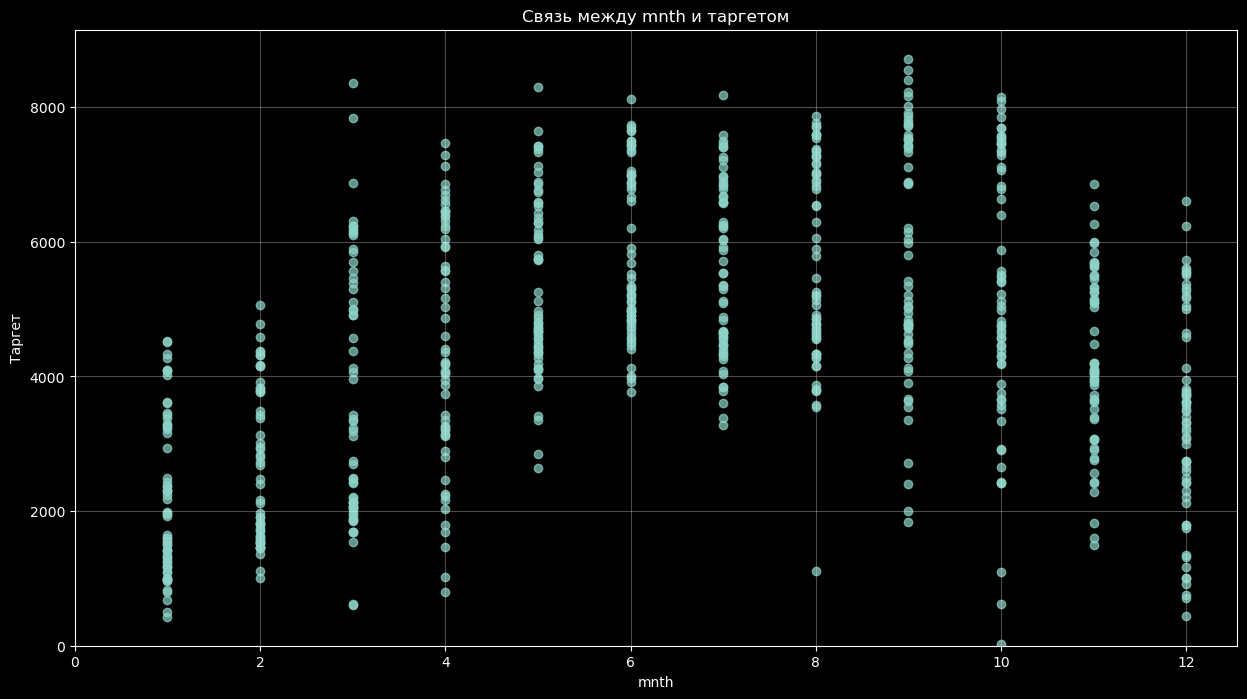

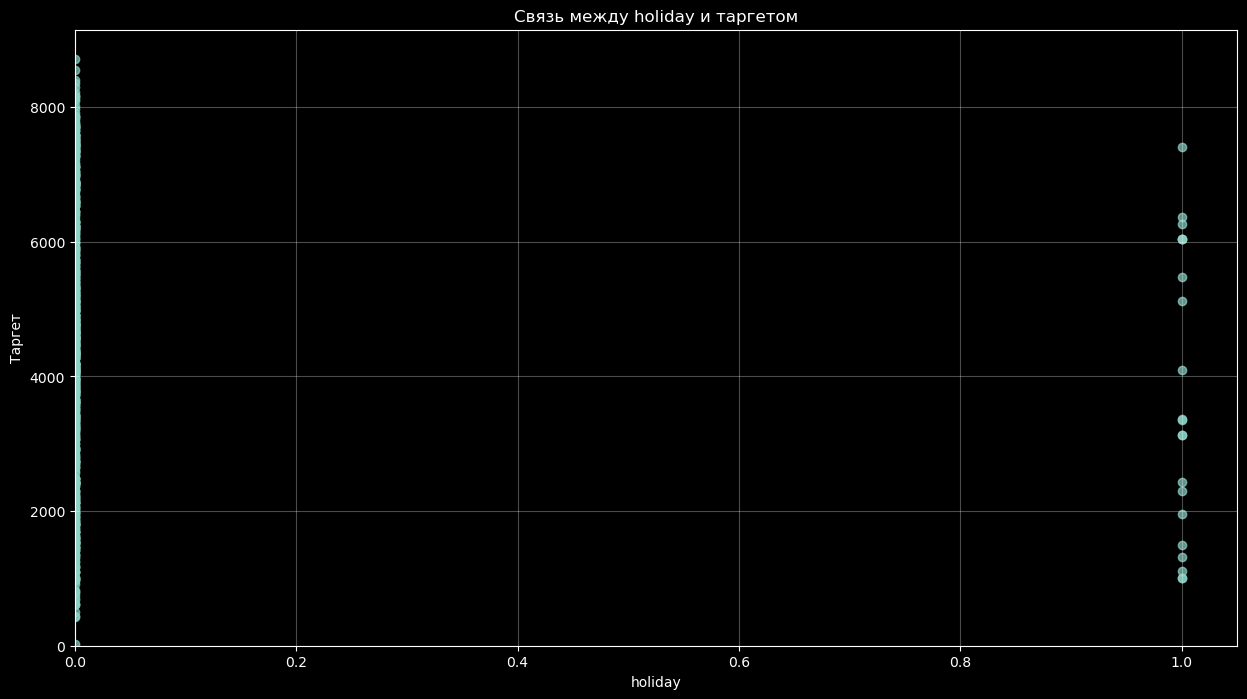

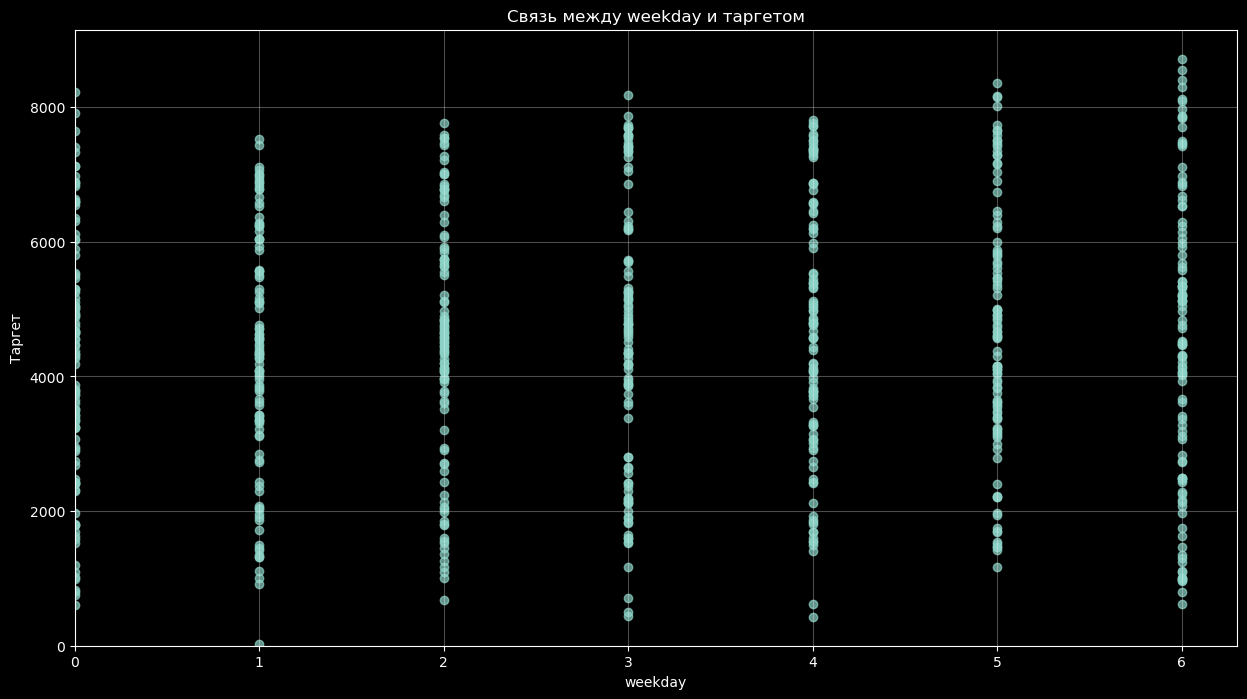

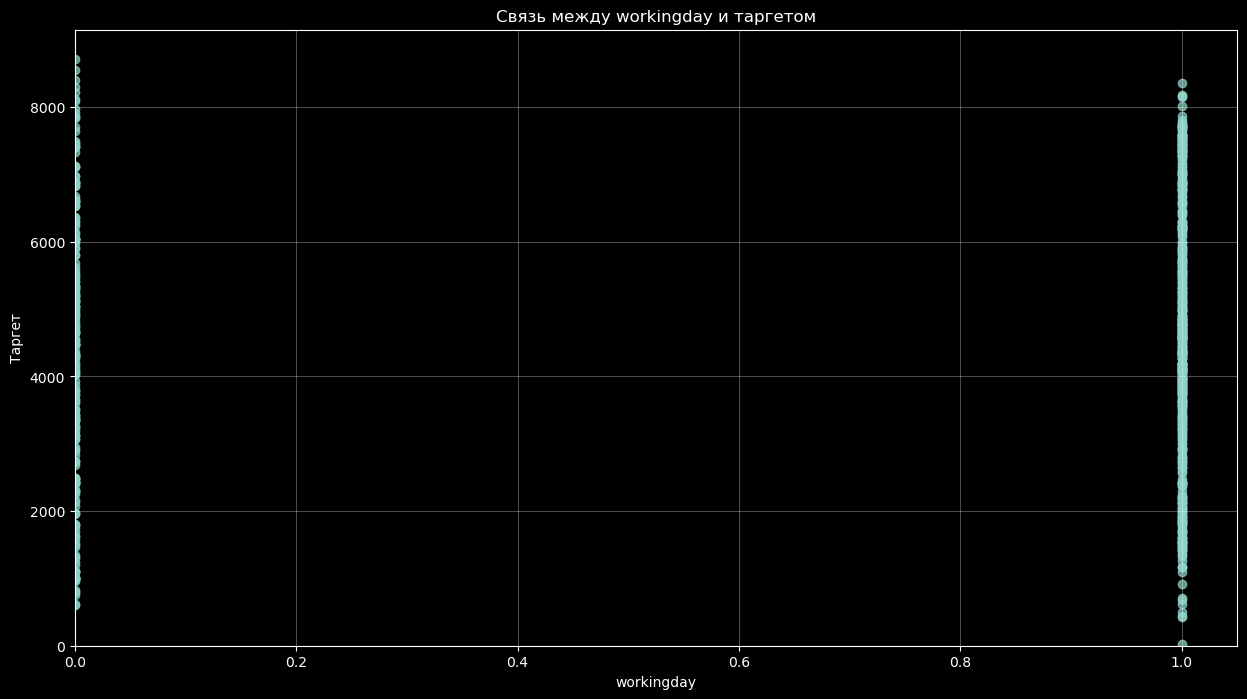

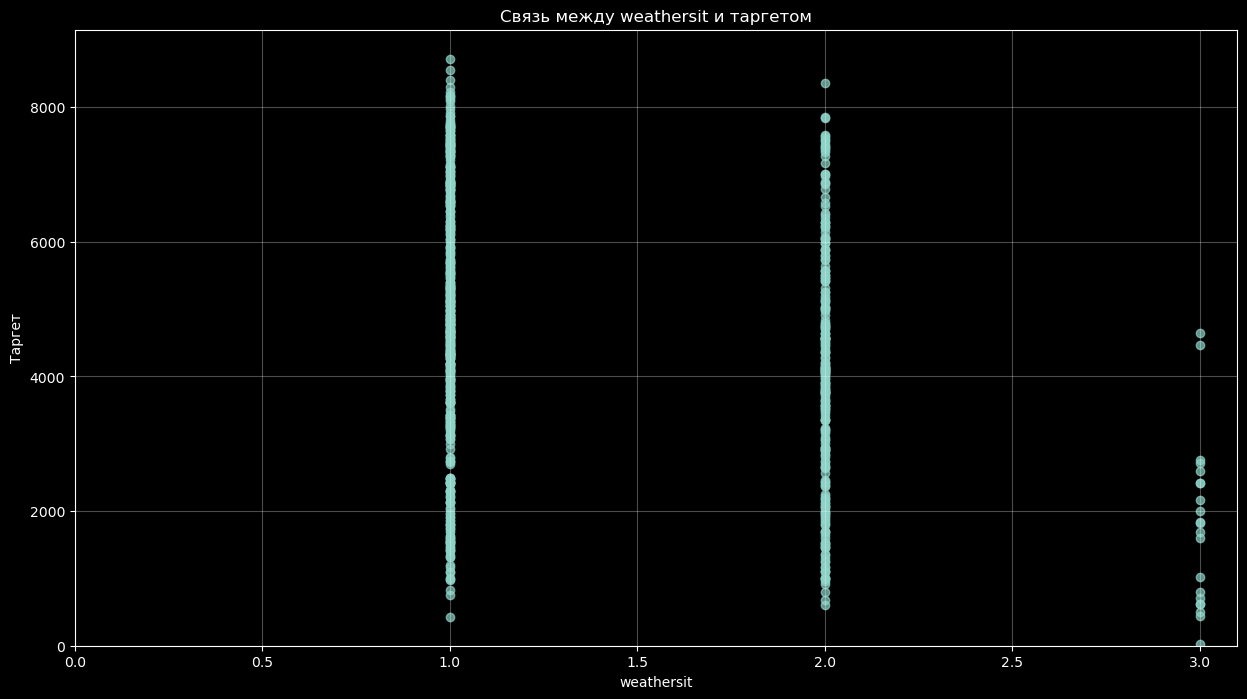

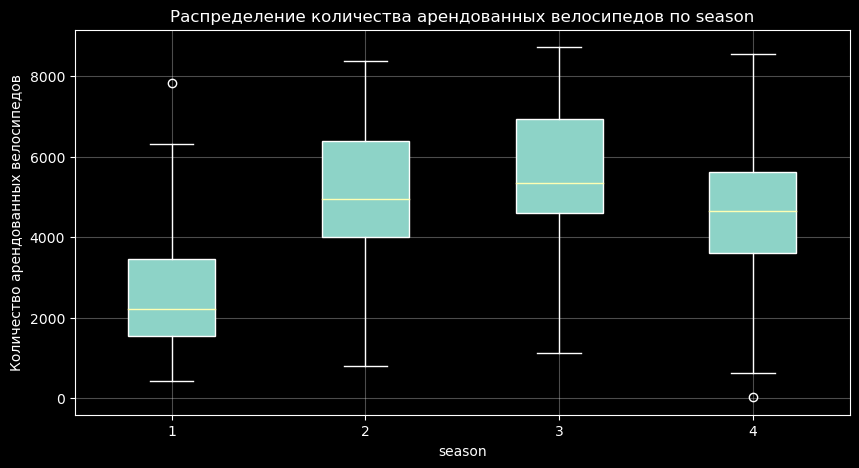

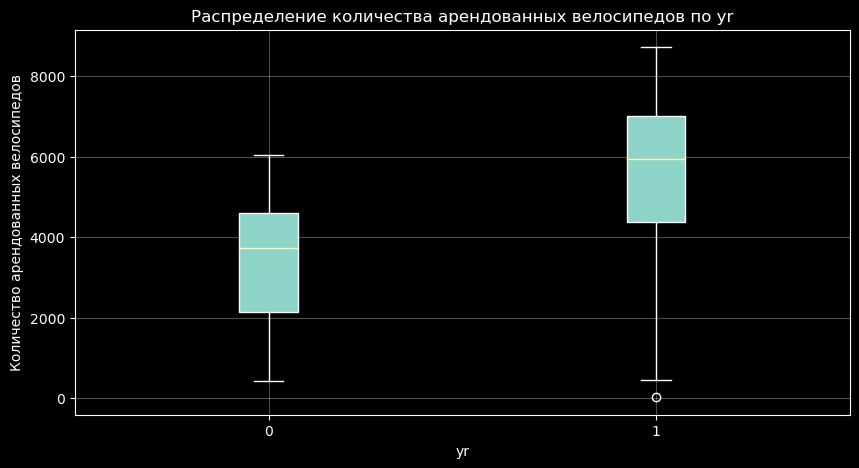

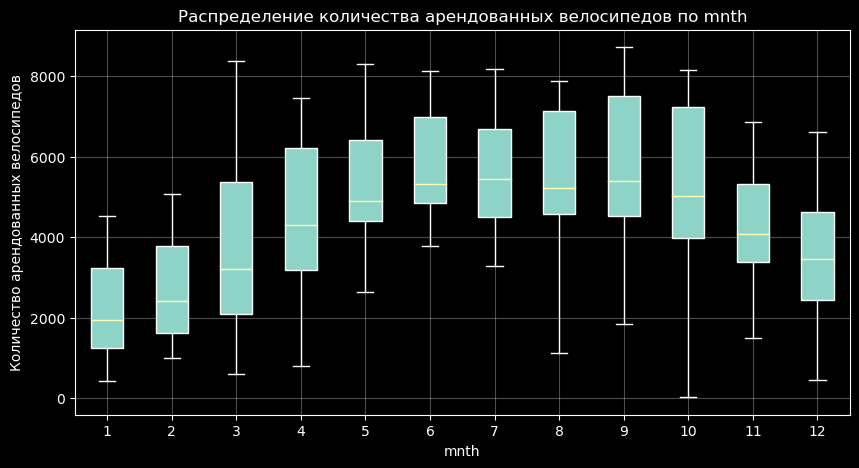

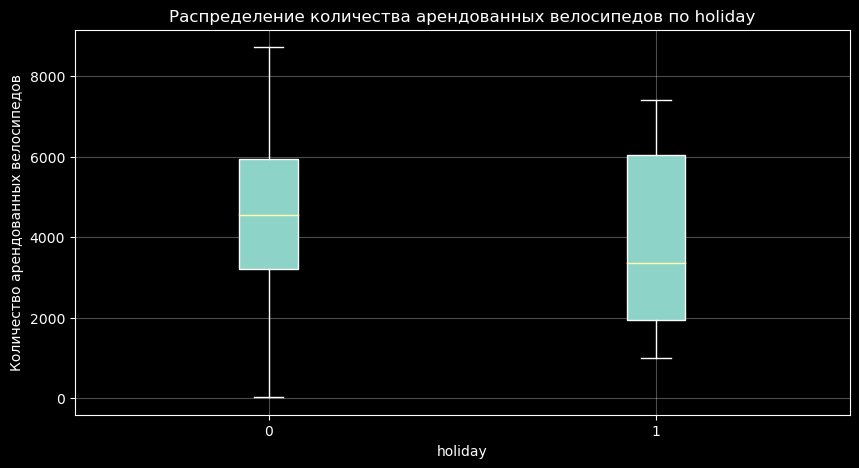

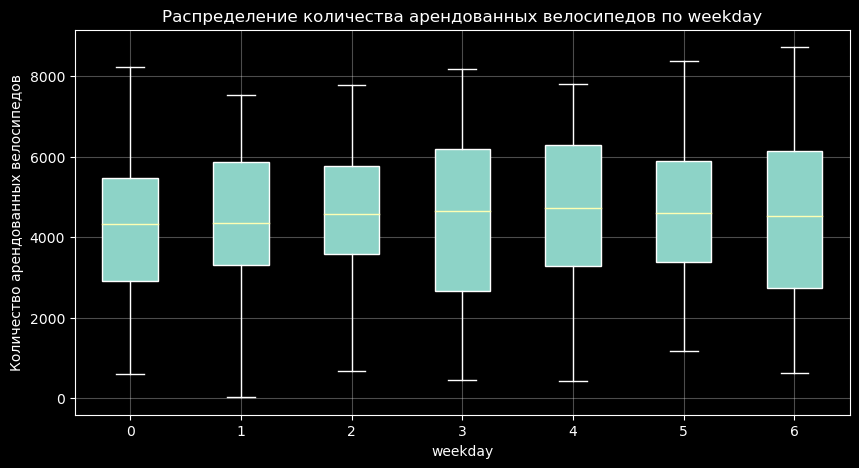

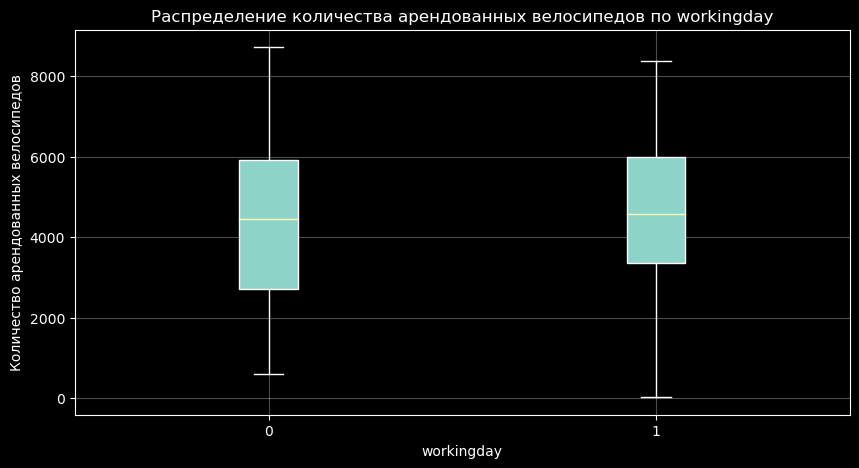

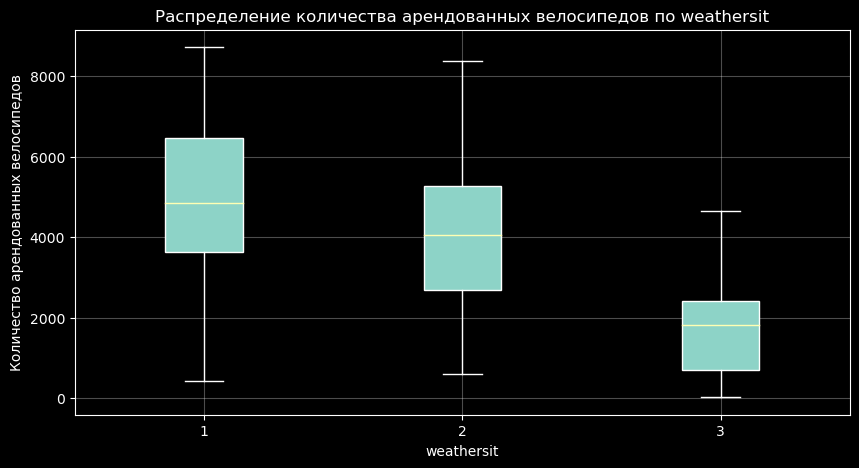

In [11]:
plt.style.use('dark_background') 
#скаттер для реальных переменных
for var in var_real:
    plt.figure(figsize = (15, 8))
    plt.title(f'Связь между {var} и таргетом')
    plt.xlabel(var)
    plt.ylabel('Таргет')
    plt.scatter(df[var], df['cnt'], alpha = 0.7)
    plt.xlim(0)
    plt.ylim(0)
    plt.grid(True, alpha = 0.3)
    
#скаттер для категориальных переменных    
for var in var_cat:
    plt.figure(figsize = (15, 8))
    plt.title(f'Связь между {var} и таргетом')
    plt.xlabel(var)
    plt.ylabel('Таргет')
    plt.scatter(df[var], df['cnt'], alpha = 0.7)
    plt.xlim(0)
    plt.ylim(0)
    plt.grid(True, alpha = 0.3)
    
#боксплот для категориальных переменных (ну так реально покрасивше выглядит)
for var in var_cat:
    sorted_values = sorted(df[var].unique())
    data_to_plot = [df[df[var] == value]['cnt'] for value in sorted_values]

    plt.figure(figsize = (10, 5))
    plt.boxplot(data_to_plot, patch_artist = True, labels = [str(value) for value in sorted_values])
    plt.title(f'Распределение количества арендованных велосипедов по {var}')
    plt.xlabel(var)
    plt.ylabel('Количество арендованных велосипедов')
    plt.grid(True, alpha = 0.3)
    plt.show()


#в датасете нету погоды 4 - туман, ливень. Поэтому боксплот от weathersit содержит всего три ящика.

__д) [5 баллов]__ Каков характер зависимости числа прокатов от месяца? От каких признаков спрос зависит линейно? 

__Ответ:__  Зависимость количества проката от месяца представляет собой очевидное нормальное распределение с пиком, где его и можно ожидать логически- летом-ранней осенью. Отчетливо видна колокообразная структура распределения.

Линейная зависимость cnt наблюдается от переменных holiday. Отрицательная зависимость, что вообще то странно. Логика подсказывает, что если день праздничный, мы должны видеть большее количество арендованных велосипедов, однако на практике все наоборот. Возможно, в праздниычный день, люди предпочитают больше посидеть дома с семьей (новый год и подобные) или провести время не в парковой зоне (то есть без необходимости в аренде велосипеда).

Положительная линейная зависимость наблюдается между cnt и yr. Одна из возможных причин- аренда велосипедов развивается во времени, поэтому в 2012 году было попросту больше сервисов аренды/люди начали интересоваться этим. Примерно то же самое происходит сейчас с арендой электросамокатов, в 2022 году на них каталось полтора человека, а сейчас спрос огромен.

Наконец, самая очевидная отрицательная линейная зависимость встречается между cnt и weathersit. Отчетливо видно понижение количества арендованных самокатов с ухудшением погоды.

__е) [5 баллов]__ Постройте гистограммы для всех непрерывных переменных. Что можете сказать о выбросах? 

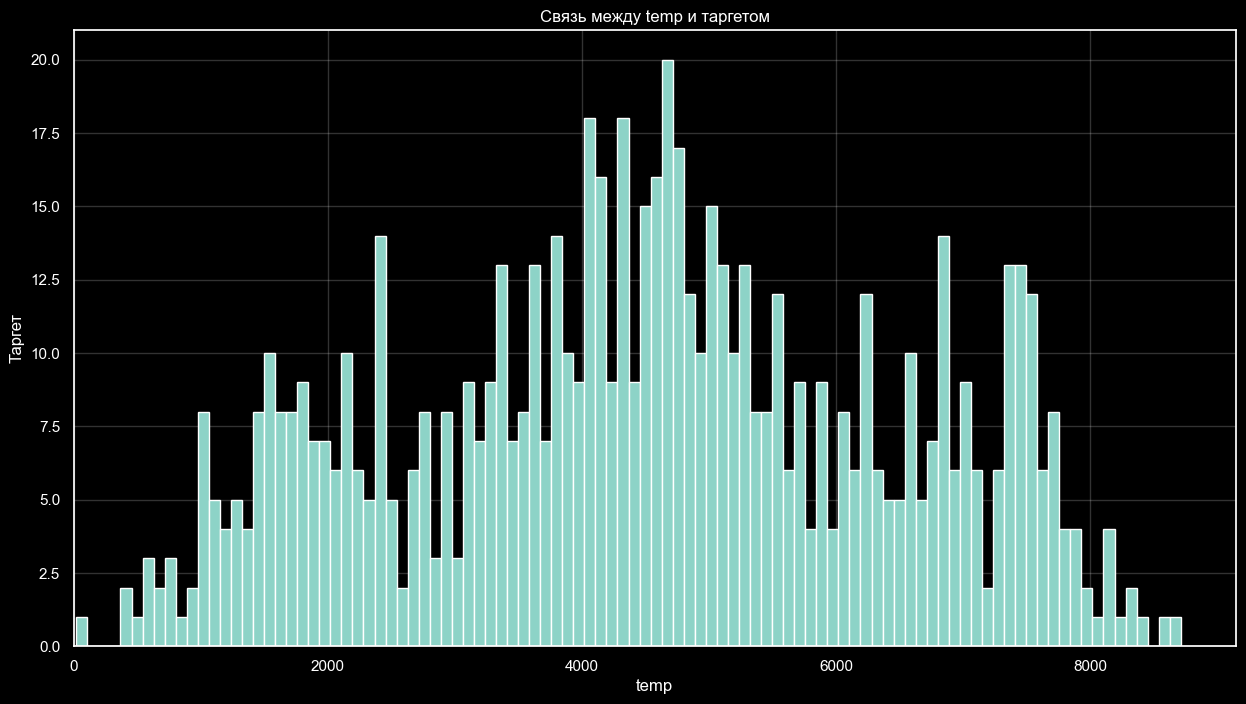

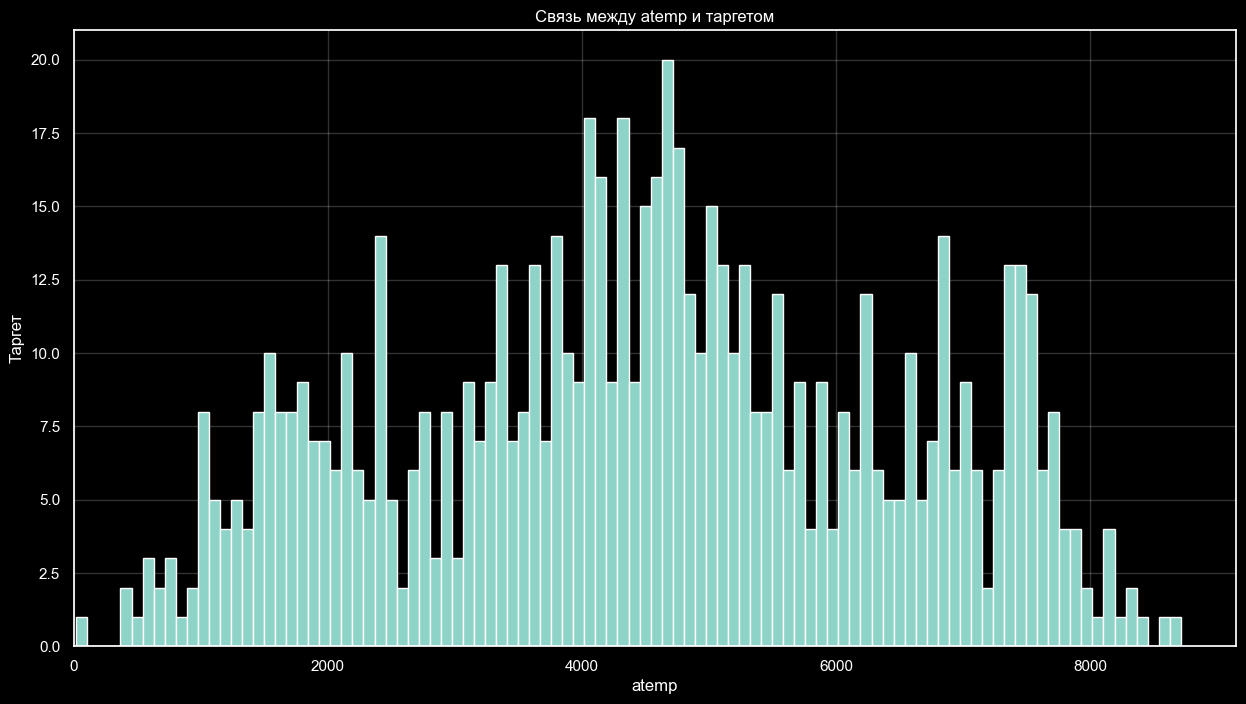

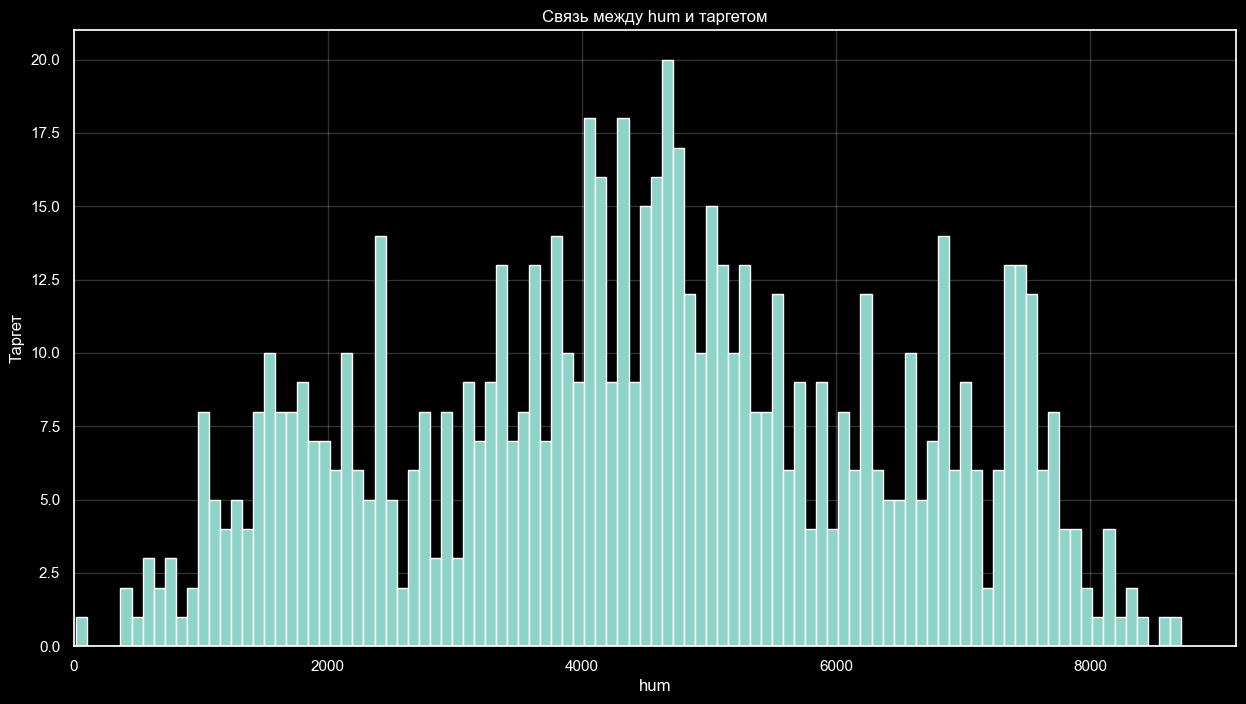

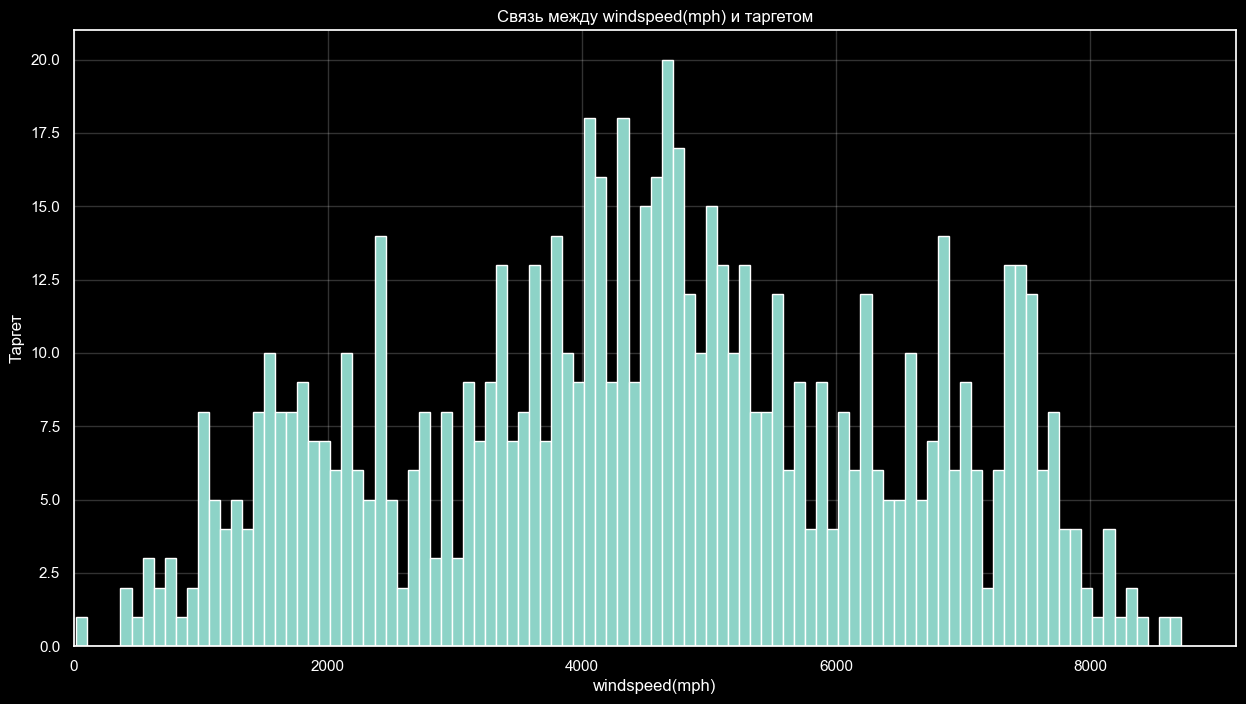

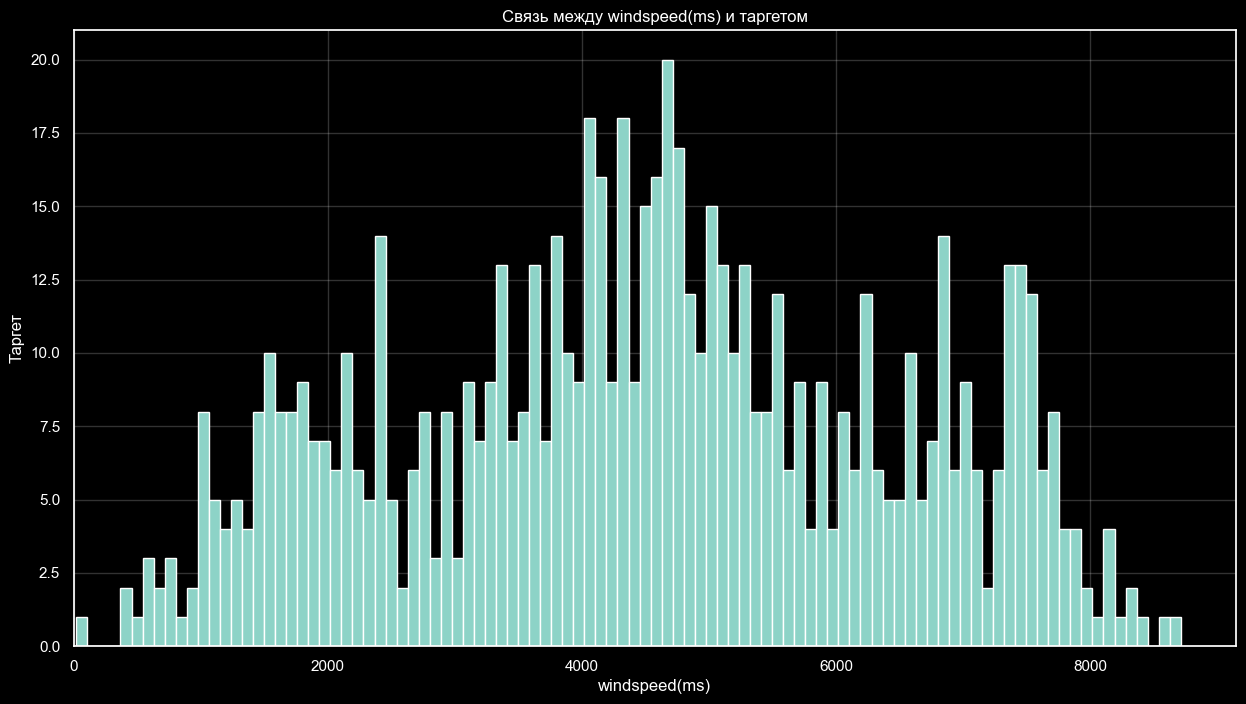

In [185]:
for var in var_real:
    plt.figure(figsize = (15, 8))
    plt.title(f'Связь между {var} и таргетом')
    plt.xlabel(var)
    plt.ylabel('Таргет')
    plt.hist(df['cnt'], bins = 100, edgecolor = 'white')
    plt.xlim(0)
    plt.ylim(0)
    plt.grid(True, alpha = 0.2)

__ж) [5 баллов]__ Постройте между непрерывными признаками корреляционную матрицу. Нарисуйте её. Какие признаки, скорее всего, неинформативны? Почему они на ваш взгляд такие? 

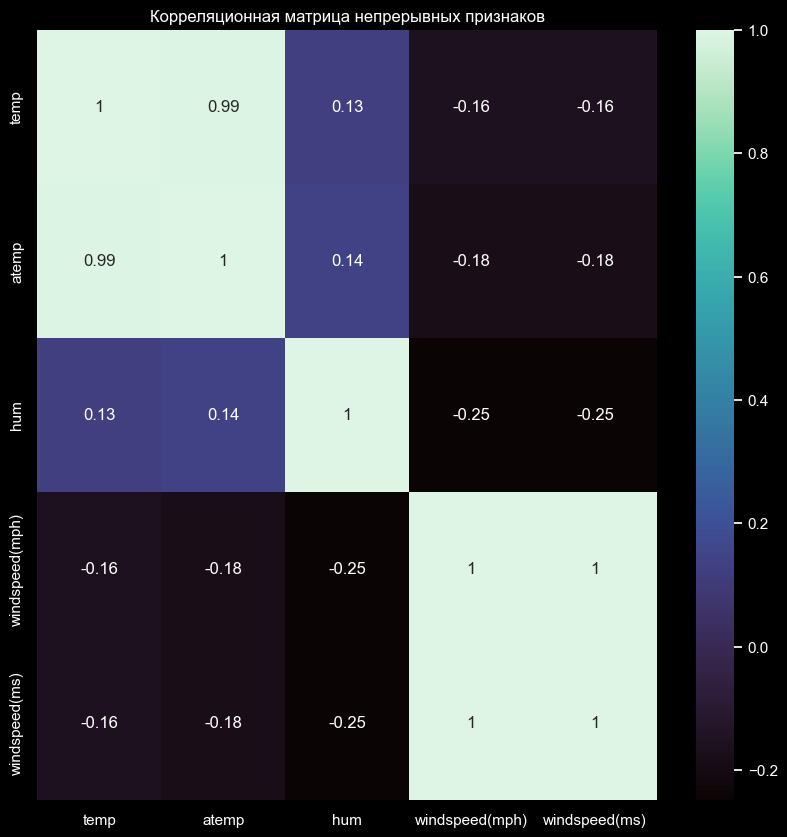

In [180]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[var_real].corr(), annot=True, cmap='mako')
plt.title('Корреляционная матрица непрерывных признаков')
plt.show()

__Ответ:__ Неинформативные признаки - temp/atemp, какой-то из них стоит убрать, т.к. корреляция приближается к 1. То же самое с windspeed в разных юнитах, корреляция -> 1


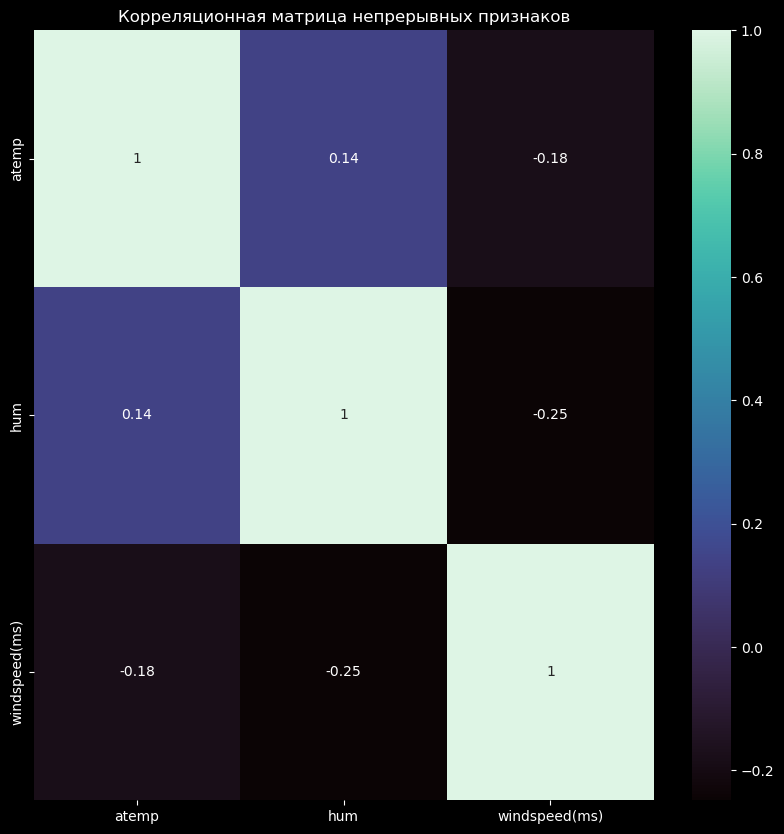

In [19]:
var_new = ['atemp', 'hum', 'windspeed(ms)']
plt.figure(figsize=(10, 10))
sns.heatmap(df[var_new].corr(), annot=True, cmap='mako')
plt.title('Корреляционная матрица непрерывных признаков')
plt.show()
#вот теперь хорошо


__з) [5 баллов]__ Постройте для всех категориальных переменных _countplot_. Что интересного вы видите в распределеии этих признаков?  Встречаются ли слишком обширные категории, в которых очень маленькие 
части нам придётся объединять в категорию "другое"? 

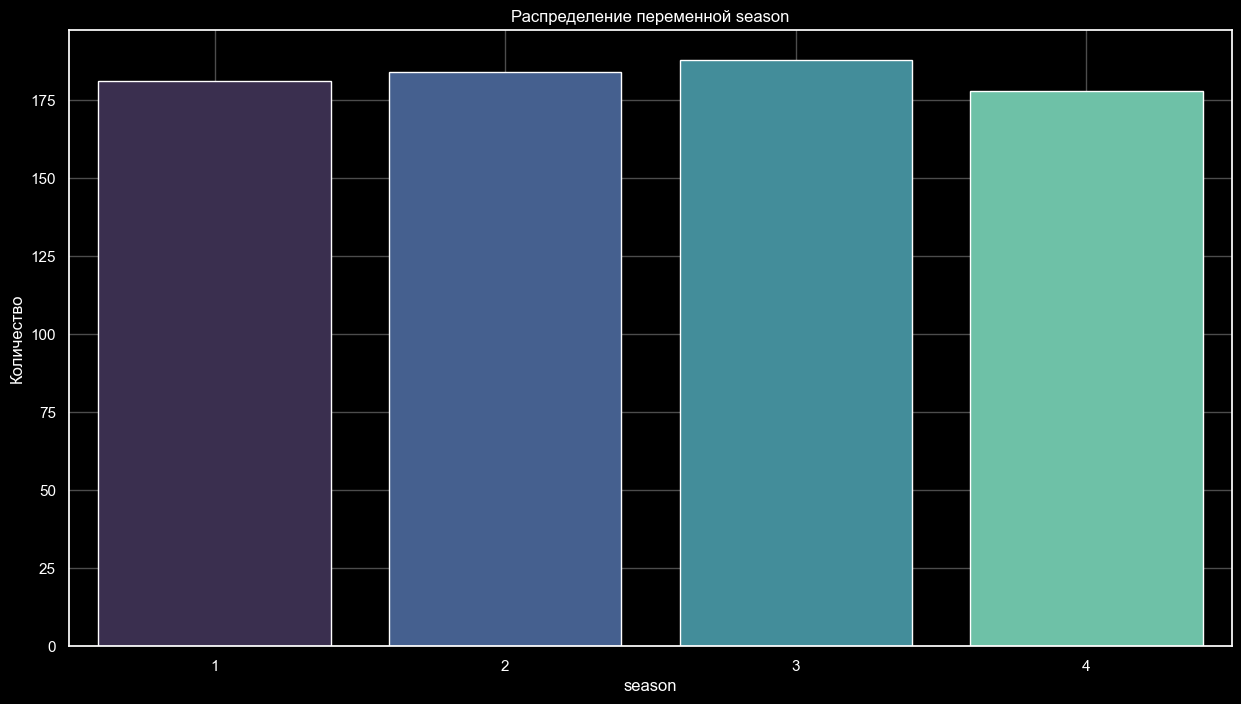

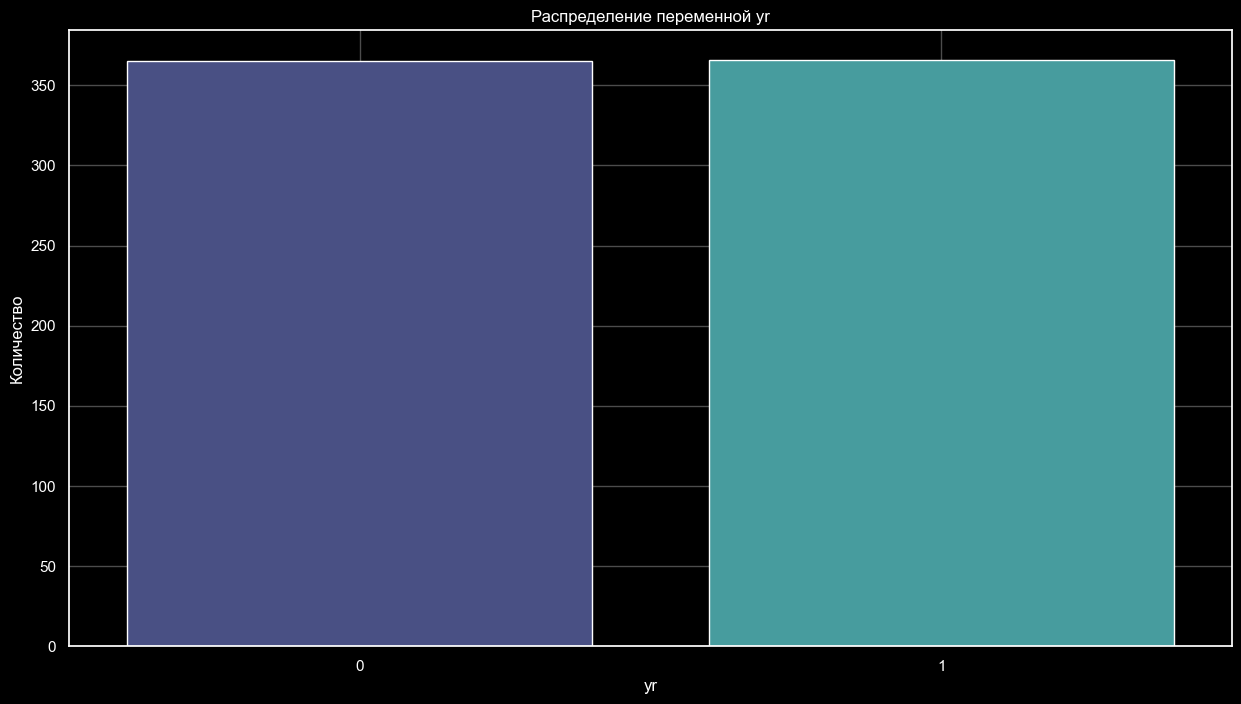

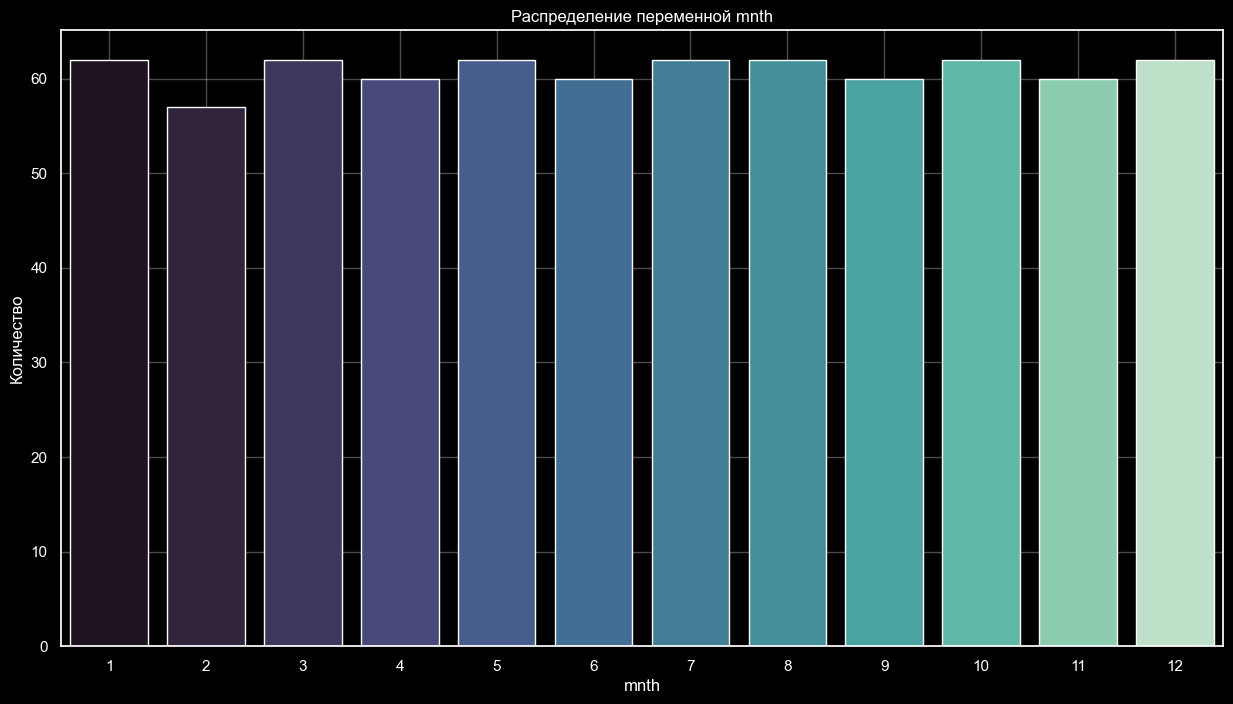

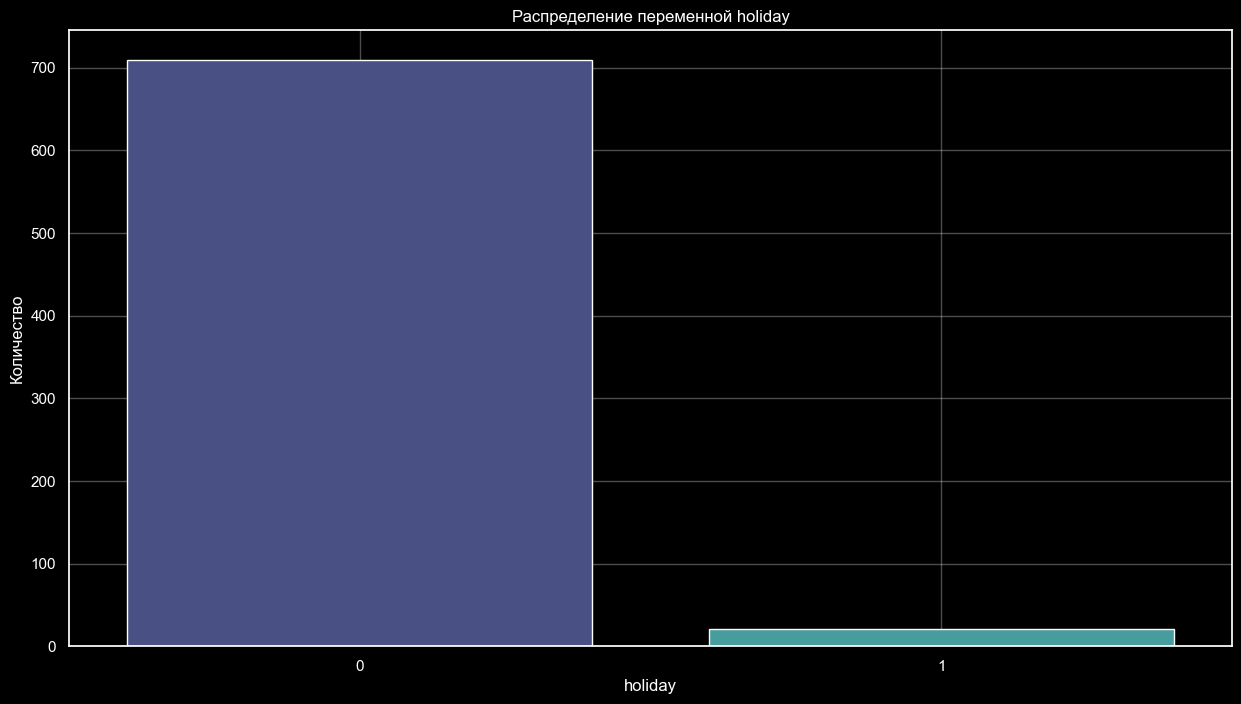

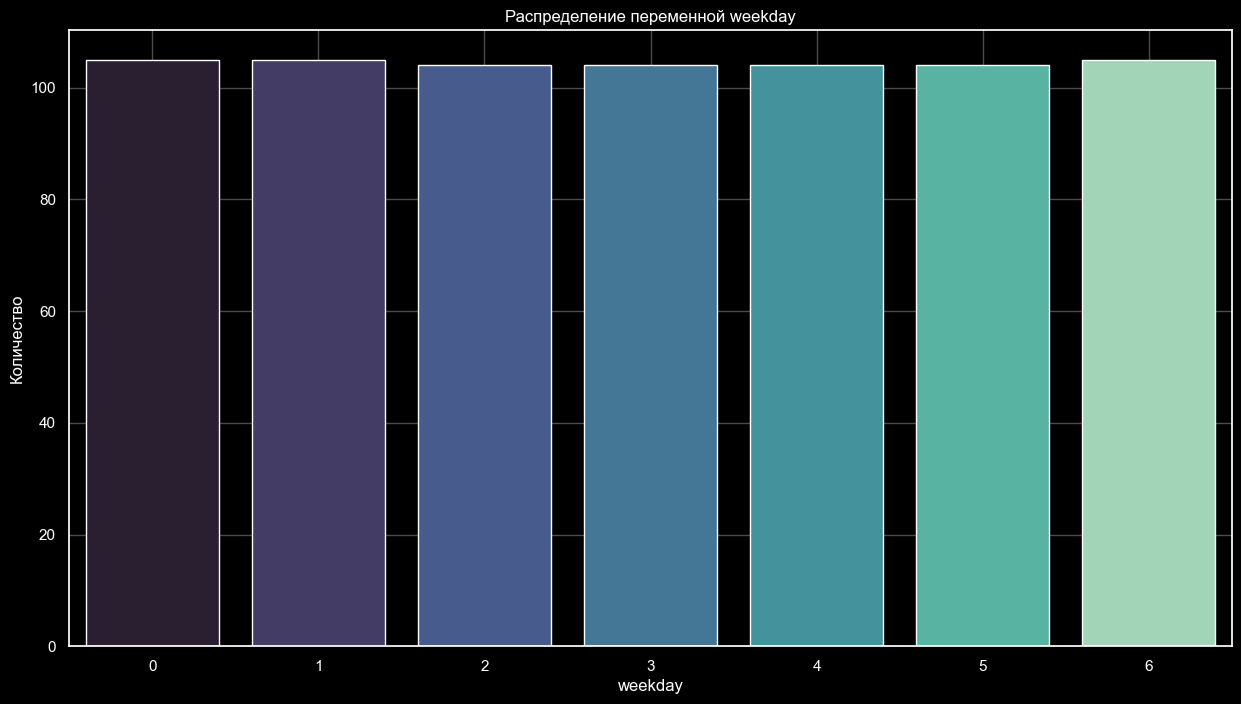

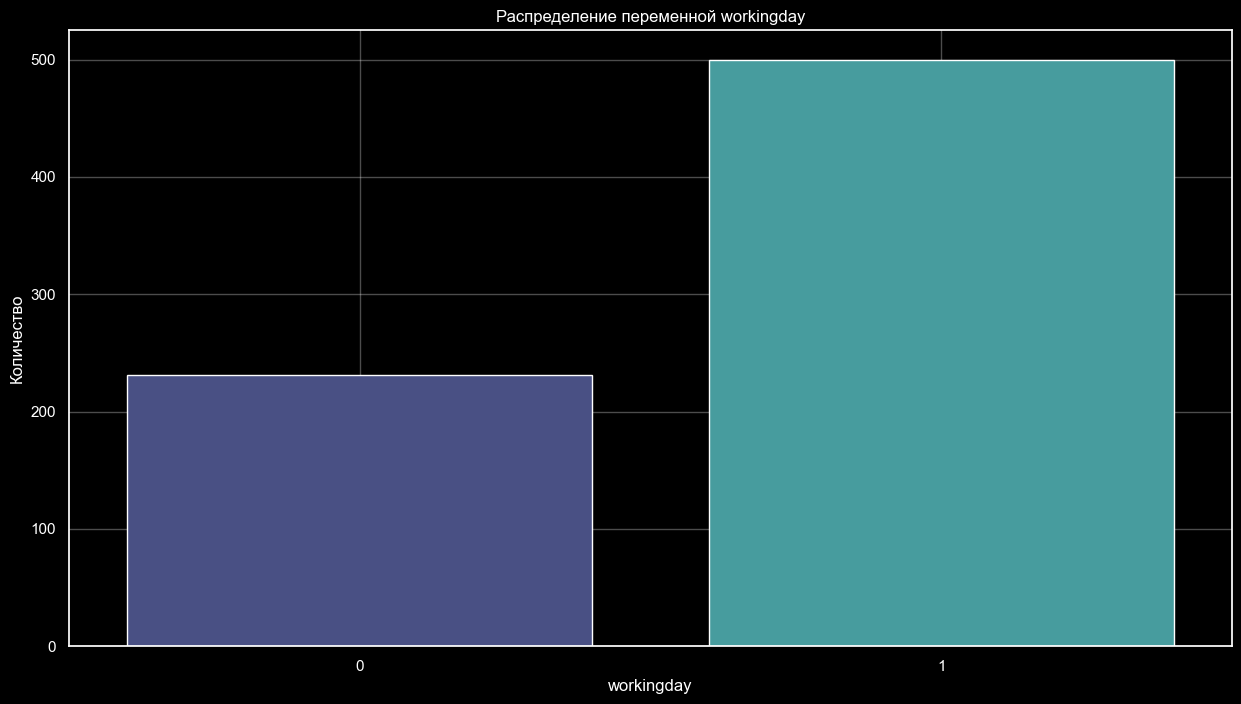

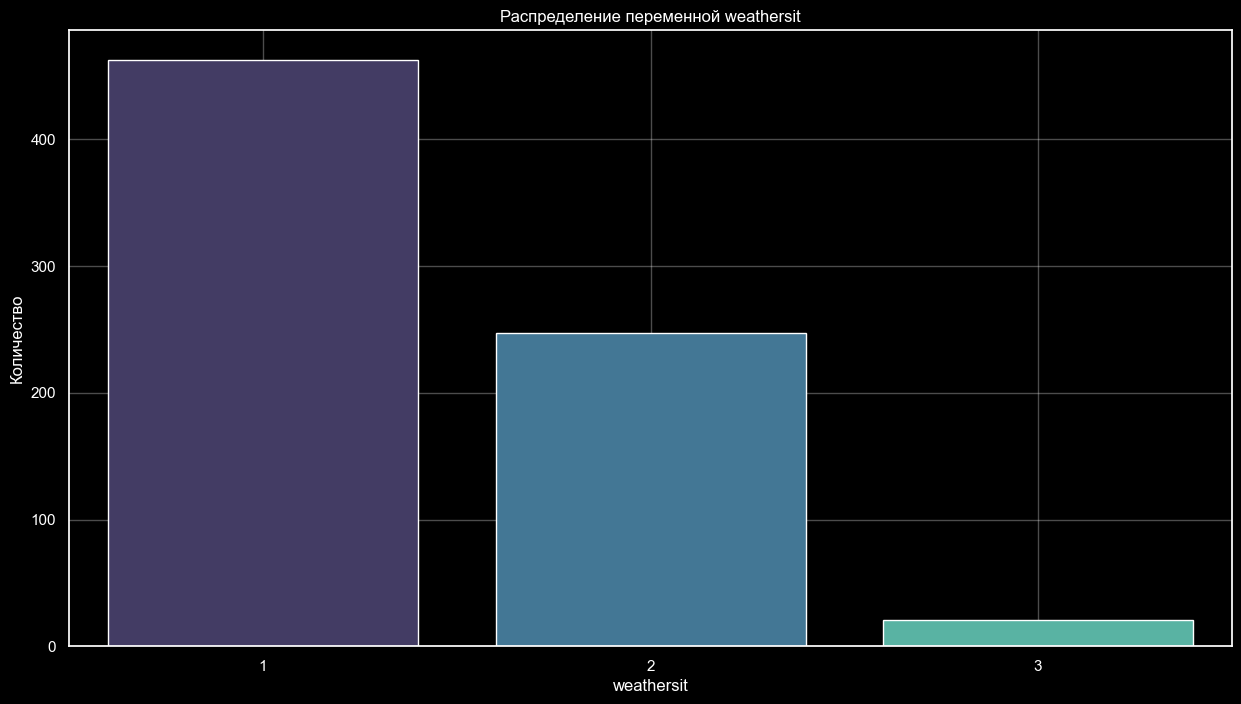

In [184]:
for var in var_cat:
    plt.figure(figsize = (15, 8))
    sns.countplot(data = df, x = var, palette = 'mako')
    plt.title(f'Распределение переменной {var}')
    plt.xlabel(var)
    plt.ylabel('Количество')
    plt.grid(True, alpha = 0.3)
    plt.show()

__Ответ:__  Значительная разница в кол-ве наблюдений присутствует в countplot holiday, количество непраздников больше примерно в 7 раз

так же и с рабочими днями, рабочих дней больше в два раза чем нерабочих

ну и weathersit тоже показывает значительное снижение количества, чем хуже погода. Что интересно, в дб не встречается погода 4

__и) [5 баллов]__  Сделайте OHE-кодирование. Сколько свежих OHE-признаков у нас появилось? 

In [28]:
df_ohe = pd.get_dummies(df, columns = var_cat)
new_features_count = len(df_ohe.columns) - (len(df.columns) - len(var_cat))
print(f"Новых OHE-признаков: {new_features_count}")

df_ohe

Новых OHE-признаков: 32


,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,season_1,season_2,season_3,season_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,4.805490,985,True,False,False,False,...,False,False,False,False,True,True,False,False,True,False
1,14.902598,17.68695,69.6087,16.652113,7.443949,801,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,8.050924,9.47025,43.7273,16.636703,7.437060,1349,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3,8.200000,10.60610,59.0435,10.739832,4.800998,1562,True,False,False,False,...,True,False,False,False,False,False,True,True,False,False
4,9.305237,11.46350,43.6957,12.522300,5.597810,1600,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,10.486773,2114,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
727,10.386653,12.75230,59.0000,10.416557,4.656485,3095,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
728,10.386653,12.12000,75.2917,8.333661,3.725374,1341,True,False,False,False,...,False,False,False,False,True,True,False,False,True,False
729,10.489153,11.58500,48.3333,23.500518,10.505372,1796,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False


__к) [5 баллов]__   Некоторые из наших переменных могут вносить в спрос на велики квадратичный вклад. Например, температура. 

Сначала, когда температура возрастает, люди выходят кататься охотнее, а потом, когда становится жарко, спрос резко падает. Так возникает параболическая зависимость. 

Создайте для каждой действительной переменной из данных дополнительную переменную: её квадрат. 

In [29]:
for var in var_real:
    df_ohe[f'{var}_squared'] = df_ohe[var] ** 2

df_ohe

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,season_1,season_2,season_3,season_4,...,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,temp_squared,atemp_squared,hum_squared,windspeed(mph)_squared,windspeed(ms)_squared
0,14.110847,18.18125,80.5833,10.749882,4.805490,985,True,False,False,False,...,True,False,False,True,False,199.116003,330.557852,6493.668239,115.559963,23.092738
1,14.902598,17.68695,69.6087,16.652113,7.443949,801,True,False,False,False,...,True,False,False,True,False,222.087427,312.828200,4845.371116,277.292867,55.412371
2,8.050924,9.47025,43.7273,16.636703,7.437060,1349,True,False,False,False,...,False,True,True,False,False,64.817377,89.685635,1912.076765,276.779887,55.309860
3,8.200000,10.60610,59.0435,10.739832,4.800998,1562,True,False,False,False,...,False,True,True,False,False,67.240000,112.489357,3486.134892,115.343991,23.049580
4,9.305237,11.46350,43.6957,12.522300,5.597810,1600,True,False,False,False,...,False,True,True,False,False,86.587436,131.411832,1909.314198,156.807997,31.335472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,10.486773,2114,True,False,False,False,...,False,True,False,True,False,108.594052,128.416490,4263.006089,550.320505,109.972406
727,10.386653,12.75230,59.0000,10.416557,4.656485,3095,True,False,False,False,...,False,True,False,True,False,107.882561,162.621155,3481.000000,108.504660,21.682853
728,10.386653,12.12000,75.2917,8.333661,3.725374,1341,True,False,False,False,...,True,False,False,True,False,107.882561,146.894400,5668.840089,69.449906,13.878409
729,10.489153,11.58500,48.3333,23.500518,10.505372,1796,True,False,False,False,...,True,False,True,False,False,110.022331,134.212225,2336.107889,552.274346,110.362849


__л) [5 баллов]__  Попробуйте придумать ещё какую-нибудь новую фичу (дополнительную переменную) для прогнозирования. Опишите какая за вашей фичёй стоит интуиция и почему это должно сработать при моделировании.

In [30]:
#нашел прикольный индекс TCI- Thermal Comfort Index, подробнее тут - https://old.meteo.md/newru/index_confort_rus.htm
#что хорошо, не надо проводить масштабирование признаков, все наши данные уже в необходимом формате
df_ohe['TCI'] = 37 - (37 - df_ohe['temp']) / (0.68 - 0.0014 * df_ohe['hum'] + 1 / (1.76 + 1.4 * df_ohe['windspeed(ms)']**0.75)) - 0.29 * df_ohe['temp'] * (1 - df_ohe['hum'] / 100)

df_ohe

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,season_1,season_2,season_3,season_4,...,workingday_1,weathersit_1,weathersit_2,weathersit_3,temp_squared,atemp_squared,hum_squared,windspeed(mph)_squared,windspeed(ms)_squared,TCI
0,14.110847,18.18125,80.5833,10.749882,4.805490,985,True,False,False,False,...,False,False,True,False,199.116003,330.557852,6493.668239,115.559963,23.092738,4.669631
1,14.902598,17.68695,69.6087,16.652113,7.443949,801,True,False,False,False,...,False,False,True,False,222.087427,312.828200,4845.371116,277.292867,55.412371,4.408146
2,8.050924,9.47025,43.7273,16.636703,7.437060,1349,True,False,False,False,...,True,True,False,False,64.817377,89.685635,1912.076765,276.779887,55.309860,-3.288020
3,8.200000,10.60610,59.0435,10.739832,4.800998,1562,True,False,False,False,...,True,True,False,False,67.240000,112.489357,3486.134892,115.343991,23.049580,-2.066634
4,9.305237,11.46350,43.6957,12.522300,5.597810,1600,True,False,False,False,...,True,True,False,False,86.587436,131.411832,1909.314198,156.807997,31.335472,-0.735625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,10.486773,2114,True,False,False,False,...,True,False,True,False,108.594052,128.416490,4263.006089,550.320505,109.972406,-2.602183
727,10.386653,12.75230,59.0000,10.416557,4.656485,3095,True,False,False,False,...,True,False,True,False,107.882561,162.621155,3481.000000,108.504660,21.682853,0.689615
728,10.386653,12.12000,75.2917,8.333661,3.725374,1341,True,False,False,False,...,False,False,True,False,107.882561,146.894400,5668.840089,69.449906,13.878409,1.050353
729,10.489153,11.58500,48.3333,23.500518,10.505372,1796,True,False,False,False,...,False,True,False,False,110.022331,134.212225,2336.107889,552.274346,110.362849,-1.751389


## 2. Обучение модели

__а) [10 баллов]__  Разбейте выборку на тренировочную и тестовую.

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_ohe.drop('cnt', axis = 1), df_ohe['cnt'], test_size = 0.2)
X_train


,temp,atemp,hum,windspeed(mph),windspeed(ms),season_1,season_2,season_3,season_4,yr_0,...,workingday_1,weathersit_1,weathersit_2,weathersit_3,temp_squared,atemp_squared,hum_squared,windspeed(mph)_squared,windspeed(ms)_squared,TCI
265,24.975847,26.10625,97.2500,5.250569,2.347147,False,False,False,True,True,...,True,False,True,False,623.792933,681.536289,9457.562500,27.568474,5.509101,21.192339
460,17.835000,21.55815,37.4167,14.708443,6.575075,False,True,False,False,False,...,True,True,False,False,318.087225,464.753831,1400.009439,216.338295,43.231613,8.572484
196,28.153347,31.91315,58.5000,13.958914,6.240015,False,False,True,False,True,...,False,True,False,False,792.610947,1018.449143,3422.250000,194.851280,38.937790,21.580786
197,29.485847,33.49165,60.4167,16.417211,7.338941,False,False,True,False,True,...,False,True,False,False,869.415173,1121.690620,3650.177639,269.524817,53.860055,23.184437
209,34.371653,39.29835,54.2500,11.667246,5.215577,False,False,True,False,True,...,True,True,False,False,1181.410530,1544.360313,2943.062500,136.124629,27.202245,28.961963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,25.283347,28.72560,69.9167,11.583161,5.177989,False,False,False,True,True,...,True,True,False,False,639.247636,825.160095,4888.344939,134.169619,26.811568,18.840743
359,13.191299,15.77675,50.6957,16.044155,7.172175,True,False,False,False,True,...,False,True,False,False,174.010369,248.905841,2570.053998,257.414910,51.440091,2.750884
227,28.734153,32.29185,57.8333,15.834043,7.078249,False,False,True,False,True,...,True,True,False,False,825.651549,1042.763576,3344.690589,250.716918,50.101609,22.111164
611,29.007500,33.08145,79.0833,10.125107,4.526199,False,False,True,False,False,...,False,True,False,False,841.435056,1094.382334,6254.168339,102.517792,20.486477,24.338119


__б) [10 баллов]__ Возьмите RMSE в качестве метрики качества. Для этого нужно написать свою функцию. Постройте наивный прогноз (среднее) и найдите для него RMSE. 

In [82]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

                  
y_pred_naive = np.ones(len(y_test)) * np.mean(y_train)
rmse(y_test, y_pred_naive)


2018.2614381415306

__в) [5 баллов]__ Запустите код с разбиением выборки на тренировочную и тестовую, подсчётом наивного прогноза и RMSE по нему несколько раз. НЕ НАДО НИЧЕГО КОПИРОВАТЬ. ПРОСТО ПЕРЕЗАПУСТИТЕ КОД ТРИ РАЗА. Меняется ли RMSE? Почему оно меняется? К чему плохому это может привести при обучении? Как это обычно исправляют? 

__Ответ:__ test_train_split использует случайное разбиение данных, а поэтому каждый раз тестовая и тренированая выборка будет разная, что приводит к изменению rmse. Эта проблема может привести к переобучению или недообучению. Решить можно установкой random_state (ну это не совсем решение, а скорее фиксация рмсе) или кросс валидацией (множественное разбиение данных).

In [88]:
for _ in range(1, 4):
    X_train, X_test, y_train, y_test = train_test_split(df_ohe.drop('cnt', axis = 1), df_ohe['cnt'], test_size = 0.2)
    y_pred_naive = np.ones(len(y_test)) * np.mean(y_train)
    print(rmse(y_test, y_pred_naive))

2124.8335017663667
1898.893148142354
1951.8932156625


In [89]:
for _ in range(1, 4):
    X_train, X_test, y_train, y_test = train_test_split(df_ohe.drop('cnt', axis = 1), df_ohe['cnt'], test_size = 0.2, random_state = 42)
    y_pred_naive = np.ones(len(y_test)) * np.mean(y_train)
    print(rmse(y_test, y_pred_naive))

2022.1728092627525
2022.1728092627525
2022.1728092627525


__г) [10 баллов]__ Оцените линейную регрессию. Насколько удалось улучшить качество прогнозирования в сравнении с наивным прогнозом?  Визуализируйте прогнозы функцией `plot_yreal_ypred`.

Что вы видите на этой визуализации? Проинтерпретируйте картинку.

__Ответ:__ Значение RMSE понизилось почти в 3 раза, что свидетельствует о более высоком качестве модели. 

На картинке видим, что прогнозируемые значния по большей части близки к реальным, особенно на train set. Однако все равно присутствуют выбросы. На test set точки так же неплохо сгруппированы около оси, однако так же не без выбросов (особенно интересен выброс на истинном значении -> 0, а предсказанный примерно 3700)

Новое RMSE: 734.9542159314082


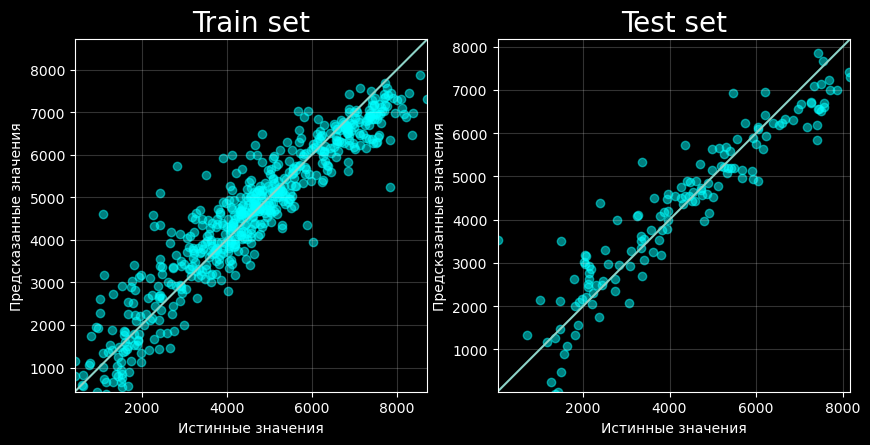

In [93]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

y_train_hat = model_regression.predict(X_train)
y_test_hat = model_regression.predict(X_test)


plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat)
print('Новое RMSE:', rmse(y_test, y_test_hat))


__д) [10 баллов]__ Какими получились значения перед коэффициентами у вашей модели?  Как думаете, почему такое произошло? 

__Ответ:__  ...

In [53]:
coefficients = model_regression.coef_
features = X_train.columns

print("Коэффициенты признаков:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")


Коэффициенты признаков:
temp: 549.3169
atemp: -167.8814
hum: 45.1710
windspeed(mph): 8434571961824.2314
windspeed(ms): -18868137478561.9062
season_1: 888553200054.4757
season_2: 888553200900.6046
season_3: 888553201298.7056
season_4: 888553201856.0914
yr_0: -177293941212.1478
yr_1: -177293939250.9936
mnth_1: -10288432839.3833
mnth_2: -10288433202.6797
mnth_3: -10288432921.6777
mnth_4: -10288433102.3689
mnth_5: -10288432570.0561
mnth_6: -10288432673.1963
mnth_7: -10288433101.0445
mnth_8: -10288433059.6797
mnth_9: -10288432686.7531
mnth_10: -10288433354.6568
mnth_11: -10288433928.0283
mnth_12: -10288433697.2104
holiday_0: 3234659493.0880
holiday_1: -4942432701.3554
weekday_0: -5126306580.8315
weekday_1: 3050785068.3222
weekday_2: 3050785132.6978
weekday_3: 3050785268.7950
weekday_4: 3050785240.6677
weekday_5: 3050785315.8843
weekday_6: -5126306199.2647
workingday_0: 4099088839.3173
workingday_1: -4078002650.1311
weathersit_1: -8256277534.4966
weathersit_2: -8256277994.0056
weathersit_3: 

аааа ловушка фиктивных переменных!
надо дропнуть по одной переменной из каждого признака, тогда пофиксится



In [101]:

df_ohe.drop(['windspeed(ms)_squared', 'windspeed(mph)_squared', 'windspeed(ms)', 'mnth_1', 'season_1', 'yr_0', 'holiday_0', 'weekday_0', 'workingday_0', 'weathersit_1'], axis=1, inplace=True, errors='ignore')

X = df_ohe.drop('cnt', axis=1)  
y = df_ohe['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

new_coefficients = model_regression.coef_
features = X_train.columns
print("Новые коэффициенты признаков:")
for feature, coef in zip(features, new_coefficients):
    print(f"{feature}: {coef:.4f}")


Новые коэффициенты признаков:
temp: 636.8454
atemp: -157.9247
hum: 44.2478
windspeed(mph): -51.7005
season_2: 854.4044
season_3: 1025.1218
season_4: 1637.7871
yr_1: 1893.5177
mnth_2: -234.5696
mnth_3: 140.8213
mnth_4: -213.2080
mnth_5: 184.7643
mnth_6: 191.0017
mnth_7: -112.0024
mnth_8: -33.6384
mnth_9: 357.8860
mnth_10: -267.5276
mnth_11: -796.4736
mnth_12: -581.1297
holiday_1: -198.6790
weekday_1: -53.8022
weekday_2: -34.3865
weekday_3: 42.1828
weekday_4: 76.2343
weekday_5: 101.2503
weekday_6: 501.9073
workingday_1: 330.1577
weathersit_2: -457.7582
weathersit_3: -1442.4891
temp_squared: -11.5736
atemp_squared: 2.6974
hum_squared: -0.5116
TCI: -28.5922


ну уже больше похоже на правду

все выглядит достаточно логично

1. Положительные коэффициенты для temp и отрицательные для temp_squared подтверждают нелинейную зависимость
2. Умеренно отрицательные коэффициенты для windspeed(mph) и hum_squared показывают, что высокие значения этих переменных могут негативно сказываться на спросе.
3. Отрицательные коэффициенты у weathersit - тоже очень логично, чем больше значение, тем хуже погода.
4. Положительные коэффициенты для сезонов 2, 3 и 4 указывают на увеличение спроса в эти периоды по сравнению с базовым сезоном (весна)
5. Влияние дней недели и рабочих дней варьируется, с наибольшим положительным вкладом в выходные (weekfay_6)
6. Отрицательные коэффициенты для худших погодных условий подтверждают, что неблагоприятные условия снижают спрос на аренду велосипедов.
7. Небольшой отрицательный коэффициент для праздничных дней может указывать на снижение спроса в эти дни, возможно, из-за закрытых офисов и учебных заведений+желания людей провести время с семьей.

## 3. Бонус

__a) [2 балла]__ Обучите Lasso-регрессию. В качестве силы регуляризации возьмите $\alpha = 40$. 

* Каким получилось качество прогноза? 
* Что в модели произошло с коэффициентами?  

In [105]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=40)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

print(f"RMSE: {rmse(y_test, y_pred_lasso)}")

lasso_coefficients = lasso_model.coef_
print("Коэффициенты:")
for feature, coef in zip(features, lasso_coefficients):
    print(f"{feature}: {coef:.4f}")

RMSE: 826.3059922957541
Коэффициенты:
temp: 447.1719
atemp: 0.0000
hum: 64.6235
windspeed(mph): -38.8284
season_2: 0.0000
season_3: 0.0000
season_4: 442.2200
yr_1: 1666.4803
mnth_2: -0.0000
mnth_3: 0.0000
mnth_4: -0.0000
mnth_5: 0.0000
mnth_6: 0.0000
mnth_7: -0.0000
mnth_8: -0.0000
mnth_9: 0.0000
mnth_10: 0.0000
mnth_11: -0.0000
mnth_12: -0.0000
holiday_1: -0.0000
weekday_1: -0.0000
weekday_2: -0.0000
weekday_3: 0.0000
weekday_4: 0.0000
weekday_5: 0.0000
weekday_6: 0.0000
workingday_1: 0.0000
weathersit_2: -0.0000
weathersit_3: -0.0000
temp_squared: -8.7459
atemp_squared: -0.6147
hum_squared: -0.7862
TCI: 78.5145


C:\Users\nrina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+06, tolerance: 2.141e+05
  model = cd_fast.enet_coordinate_descent(


__Ответ:__   Rmse чуть увеличилось по сравнению с регрессией, что ожидаемо для лассо. Большинство коэффициентов было сведено к нулю, что также характерно для лассо регрессии, которая борется с мультиколлинеарностью. Эти признаки можно считать менее значимыми для модели.
оставшиеся ненулевые коэффициенты (например, temp, season_4, yr_1, и TCI) показывают переменные, которые лассо считает наиболее важными для предсказания целевой переменной.

temp сохранил значительный положительный коэффициент, в то время как atemp полностью исключён из модели, что подтверждает предположение о корреляции между этими признаками и выборе моделью более важного из них.




__б) [0 баллов]__  Изучите код в этом пункте и прочитайте выводы. Подумайте об этом. 

В случае линейных моделей, обычно, используют два вида регуляризации: Ridge и Lasso. Первая прибавляет к MSE квадраты коэффицентов, а вторая модули. Давайте посмотрим какая между ними разница.

In [41]:
from sklearn.linear_model import Lasso, Ridge  # подгружаем модели

Обучим много-много моделей с разными силами регуляризации $\alpha$ и посмотрим что получится.

In [42]:
alphas = np.arange(1, 100, 2)   # задали диапазон для силы регуляризатора

# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)  # для каждого alph обучаем модель
    ls = Lasso(alpha=alph)
    rg.fit(X,y)
    ls.fit(X,y)
    coefs_ridge[i] = rg.coef_  # и запоминаем коэффициенты
    coefs_lasso[i] = ls.coef_
    i += 1

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.766e+08, tolerance: 2.740e+05
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 2.740e+05
  model = cd_fast.enet_coordinate_descent(


В отличие от L2-регуляризации (Ridge), L1 (Lasso) обнуляет веса при некоторых признаках. Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$ (в лекции коэффициент при регуляризаторе мог быть обозначен другой буквой).

Text(0.5, 1.0, 'Ridge')

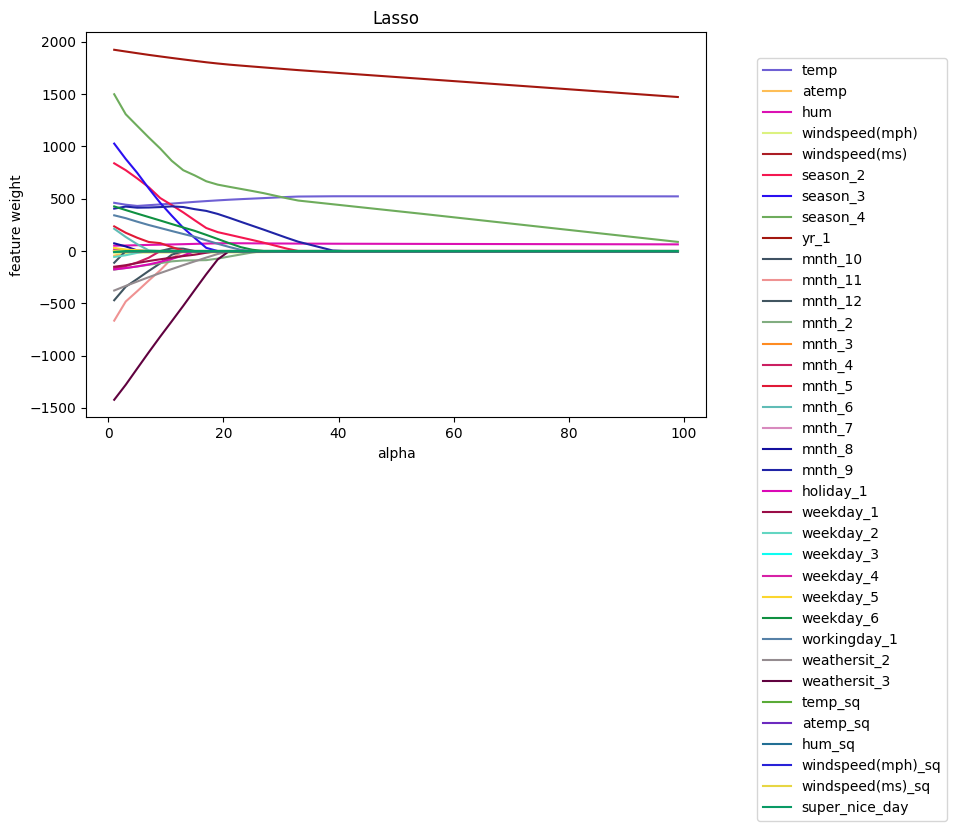

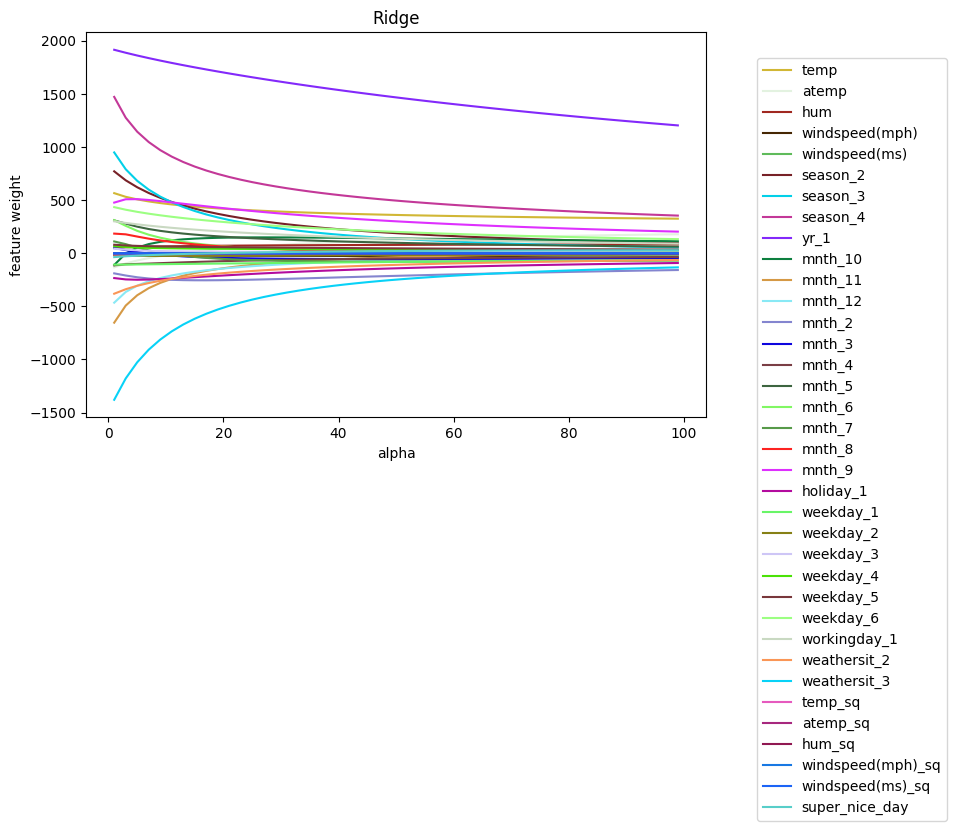

In [43]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Картинки вышли красивыми. Обратите внимание, что регуляризатор Lasso агрессивнее уменьшает веса. Подумайте с чем это связано. Если делать `alpha` очень большим, веса зануляются. В случае Ridge такого не происходит. Веса становятся всё ближе к нулю, но зануления не происходит.  Из-за того, что Lasso зануляет некоторые признаки, его можно использовать для отбора самых важных признаков. Дальше будем работать именно с ним. 

Итак, мы видим, что при изменении `alpha` модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее `alpha`. Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть MSE (Mean Square Error).

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую, то настроимся на конкретные "новые" данные, и вновь можем переобучиться. 

Именно такую настройку вы наблюдали выше, когда запускали код с наивным прогнозом много раз подряд. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения `alpha`, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку. 

Подбирать параметр `alpha` в `sklearn` совсем просто: для этого есть `GridSearchCV`. Мы уже сталкивались с примером применения этой функции на семинаре. Попробуйте с помощью неё перебрать список из альф и подыскать оптимальное. Параметр cv отвечает за то, на сколько частей делится выборка. Поставьте `cv=5`. Также укажите параметр `scoring = neg_mean_squared_error`. Это задаст функцию потерь, на которую будет ориентироваться `GridSearchCV` при переборе. Назовите переменную, в которой будет находиться перебор __grid_cv_lasso.__

__в) [2 балла]__ Подберите для Lasso-регрессии с помощью поиска по решётке оптимальное значение $\alpha$.  Каким оказалось это значение? 
 

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
#выводит кучу ошибок  Duality gap: 1.425e+08, tolerance: 2.740e+05

alphas = np.logspace(0, 2, 100)   

lasso = Lasso()
param_grid = {'alpha': alphas}
grid_cv_lasso = GridSearchCV(estimator = lasso, param_grid = {'alpha': alphas}, scoring = 'neg_mean_squared_error', cv=5)
grid_cv_lasso.fit(X_train, y_train)

print("alpha:", grid_cv_lasso.best_params_['alpha'])


alpha: 2.3101297000831598


__г) [2 балла]__ Каким получается качество прогноза для модели с оптимальным значением $\alpha$? 

In [175]:
lasso_upd = Lasso(alpha=grid_cv_lasso.best_params_['alpha'])
lasso_upd.fit(X_train, y_train)

y_pred_lasso = lasso_upd.predict(X_test)

print(f"RMSE: {rmse(y_test, y_pred_lasso)}")

lasso_coefficients = lasso_upd.coef_
print("Коэффициенты:")
for feature, coef in zip(features, lasso_coefficients):
    print(f"{feature}: {coef:.4f}")

RMSE: 733.8994272881096
Коэффициенты:
temp: 474.1403
atemp: -32.0629
hum: 47.1490
windspeed(mph): -46.3782
season_2: 770.4449
season_3: 799.9638
season_4: 1329.4486
yr_1: 1879.2732
mnth_2: -210.9169
mnth_3: 117.4947
mnth_4: -153.5371
mnth_5: 157.4118
mnth_6: 146.7801
mnth_7: -42.4076
mnth_8: 0.0000
mnth_9: 467.3838
mnth_10: -0.0000
mnth_11: -481.6605
mnth_12: -359.9690
holiday_1: -145.0531
weekday_1: -91.8226
weekday_2: -61.3212
weekday_3: -0.0000
weekday_4: 21.3313
weekday_5: 43.7958
weekday_6: 457.9869
workingday_1: 343.4735
weathersit_2: -405.2988
weathersit_3: -1266.6493
temp_squared: -8.0284
atemp_squared: 0.0921
hum_squared: -0.5500
TCI: -7.6769


__д) [2 балла]__ Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Проинтерпретируйте последнюю обученую модель. У каких признаков наибольшие положительные коэфициенты? У каких наибольшие отрицательные? Логично ли утверждать, что чем больще/меньше эти признаки, тем выше/ниже спрос на велосипеды? Какие коэффициенты занулились? 

Как и ожидалось, лассо занулила большинство переменных, ну и ладно. 

Наибольшие + коэффициенты у температуры, влажности и 2012 года
Наибольшие - коэффициенты у скорости ветра

In [ ]:
lasso_coefficients = lasso_model.coef_
print("Коэффициенты:")
for feature, coef in zip(features, lasso_coefficients):
    print(f"{feature}: {coef:.4f}")

__Ответ:__  ....

__е) [2 балла]__ В прошлой домашке, когда мы придумывали фичи, мы предположили, что спрос на велосипеды зависит от скорости ветра квадратично, по параболе. Подтвердилось ли это предположение? 

__Ответ:__  Положительные коэффициенты для temp и отрицательные для temp_squared подтверждают нелинейную зависимость